### Kütüphanelerin Import Edilmesi

Yapacağımız veri analizi için tüm gerekli kütüphaneler ve motodları import ettik. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install pingouin
from pingouin import cronbach_alpha
from sklearn.preprocessing import LabelEncoder
import scipy.stats as stats
from scipy.stats import chi2_contingency

Defaulting to user installation because normal site-packages is not writeable


### verinin okutulması

In [2]:
df  = pd.read_excel("melis-2.xlsx")
df

Zaman damgası  Gıdaları daha az israf etmeye çalışıyorum.  \
0   2023-12-03 22:02:25.649                                           4   
1   2023-12-03 22:09:59.203                                           5   
2   2023-12-04 16:33:08.605                                           4   
3   2023-12-04 21:54:35.755                                           5   
4   2023-12-11 17:23:28.423                                           3   
..                      ...                                         ...   
217 2023-12-21 08:28:36.550                                           3   
218 2023-12-21 09:40:29.634                                           4   
219 2023-12-21 09:58:50.612                                           3   
220 2023-12-21 11:20:53.700                                           2   
221 2023-12-21 13:28:18.188                                           4   

     Daha bilinçli alışveriş yapıyorum.  \
0                                     4   
1                                     5   
2                                     3   
3                                     5   
4                                     1   
..                                  ...   
217                                   3   
218                                   3   
219                                   4   
220                                   2   
221                                   4   

     Daha sağlıklı gıdaları tercih ediyorum.  \
0                                          2   
1                                          4   
2                                          5   
3                                          5   
4                                          1   
..                                       ...   
217                                        1   
218                                        3   
219                                        3   
220                                        4   
221                                        4   

     Sadece bildiğim ve güvendiğim markaları satın alıyorum.  \
0                                                    4         
1                                                    4         
2                                                    4         
3                                                    5         
4                                                    5         
..                                                 ...         
217                                                  5         
218                                                  2         
219                                                  5         
220                                                  2         
221                                                  3         

     Dükkan, market, mağaza vb. yerlerden daha az alışveriş yapıyorum.  \
0                                                    5                   
1                                                    4                   
2                                                    3                   
3                                                    5                   
4                                                    2                   
..                                                 ...                   
217                                                  5                   
218                                                  2                   
219                                                  3                   
220                                                  4                   
221                                                  2                   

     Dükkan, market, mağaza vb. yerlerden alışveriş için daha az zaman geçiriyorum.  \
0                                                    5                                
1                                                    3                                
2                                                    3                                
3            

### Verinin özetine bakılması

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 21 columns):
 #   Column                                                                                                                        Non-Null Count  Dtype         
---  ------                                                                                                                        --------------  -----         
 0   Zaman damgası                                                                                                                 222 non-null    datetime64[ns]
 1   Gıdaları daha az israf etmeye çalışıyorum.                                                                                    222 non-null    int64         
 2   Daha bilinçli alışveriş yapıyorum.                                                                                            222 non-null    int64         
 3   Daha sağlıklı gıdaları tercih ediyorum.                                         

### Yapacağımız işlemler için kullanmayacağımız kolonun silinmesi ve işlemin uygulanıp uygulanmadığının gözlemlenmesi için ilk 5 gözleme bakılması

In [4]:
df = df.drop("Zaman damgası", axis = 1)
df.head()

Gıdaları daha az israf etmeye çalışıyorum.  \
0                                           4   
1                                           5   
2                                           4   
3                                           5   
4                                           3   

   Daha bilinçli alışveriş yapıyorum.  \
0                                   4   
1                                   5   
2                                   3   
3                                   5   
4                                   1   

   Daha sağlıklı gıdaları tercih ediyorum.  \
0                                        2   
1                                        4   
2                                        5   
3                                        5   
4                                        1   

   Sadece bildiğim ve güvendiğim markaları satın alıyorum.  \
0                                                  4         
1                                                  4         
2                                                  4         
3                                                  5         
4                                                  5         

   Dükkan, market, mağaza vb. yerlerden daha az alışveriş yapıyorum.  \
0                                                  5                   
1                                                  4                   
2                                                  3                   
3                                                  5                   
4                                                  2                   

   Dükkan, market, mağaza vb. yerlerden alışveriş için daha az zaman geçiriyorum.  \
0                                                  5                                
1                                                  3                                
2                                                  3                                
3                                                  5                                
4                                                  4                                

   Dükkan, market, mağaza vb. gittiğimde işletmelerin hijyen kurallarına uyup uyumadığını kontrol ediyorum.  \
0                                                  2                                                          
1                                                  5                                                          
2                                                  4                                                          
3                                                  5                                                          
4                                                  4                                                          

   Dükkan, market, mağaza vb. gittiğimde personelin maske kullanıp kullanmadığına dikkat ediyorum.  \
0                                                  1                                                 
1                                                  5                                                 
2                                                  2                                                 
3                                                  5                                                 
4                                                  4                                                 

   Dükkan, market, mağaza vb. gitmek zorunda olduğumda, diğer tüketicilerin sosyal mesafeye uyup uymadıklarına dikkat ediyorum.  \
0                                                  1                                                                              
1                                                  3                                                                              
2                                                  2                                                                              
3                                                  5           

### Verinin kolon ve satır sayısının gözlemlenmesi

In [5]:
df.shape

(222, 20)

### Daha kolay analiz edilmesi için gelir kolonunun yerinin değiştirilmesi, gelir kolonu bizim için önemli ve kullancağımız bir kolon olduğu için int değerlerin yanına alındı

In [6]:
Gelir_Durumunuz = df['Gelir Durumunuz']
df.drop('Gelir Durumunuz', axis=1, inplace=True)
df.insert(16, 'Gelir Durumunuz', Gelir_Durumunuz)

### Value_counts metodu verinin uniq değerlerinin frekans değerlerini vermektedir. for döngüsü ile kullanacağımız tüm kolonlar döngüye sokulmuştur ve value_counts değerleri gözlemlenmiştir

In [7]:
for column in df.columns[:18]:
        value = df[column].value_counts()
        print(f"Kolon: {column}\nDeğerler:\n{value}\n")

Kolon: Gıdaları daha az israf etmeye çalışıyorum.
Değerler:
Gıdaları daha az israf etmeye çalışıyorum.
5    88
4    51
3    46
1    20
2    17
Name: count, dtype: int64

Kolon: Daha bilinçli alışveriş yapıyorum.
Değerler:
Daha bilinçli alışveriş yapıyorum.
5    80
4    59
3    52
1    18
2    13
Name: count, dtype: int64

Kolon: Daha sağlıklı gıdaları tercih ediyorum.
Değerler:
Daha sağlıklı gıdaları tercih ediyorum.
3    69
4    57
5    54
2    24
1    18
Name: count, dtype: int64

Kolon: Sadece bildiğim ve güvendiğim markaları satın alıyorum.
Değerler:
Sadece bildiğim ve güvendiğim markaları satın alıyorum.
5    66
4    64
3    56
2    22
1    14
Name: count, dtype: int64

Kolon: Dükkan, market, mağaza vb. yerlerden daha az alışveriş yapıyorum.
Değerler:
Dükkan, market, mağaza vb. yerlerden daha az alışveriş yapıyorum.
2    62
1    56
3    54
5    26
4    24
Name: count, dtype: int64

Kolon: Dükkan, market, mağaza vb. yerlerden alışveriş için daha az zaman geçiriyorum.
Değerler:
Dükk

### Değerler görselleştirilmişştir

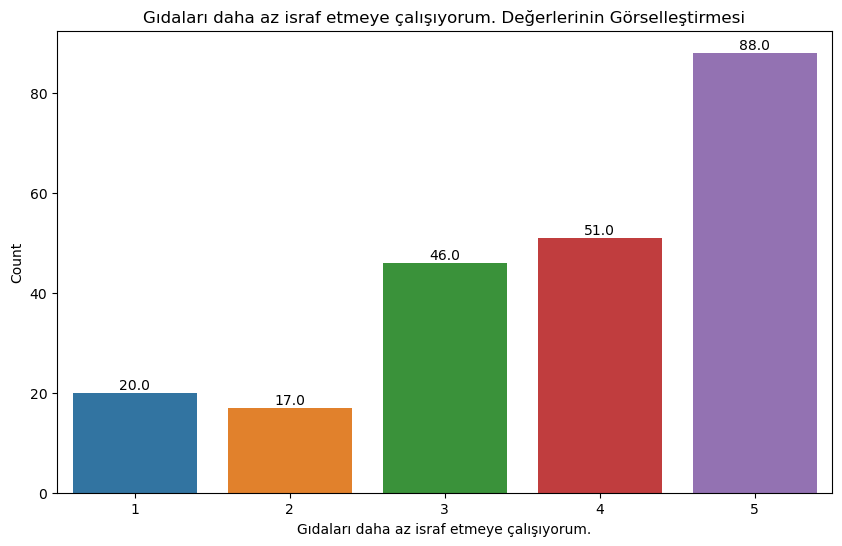

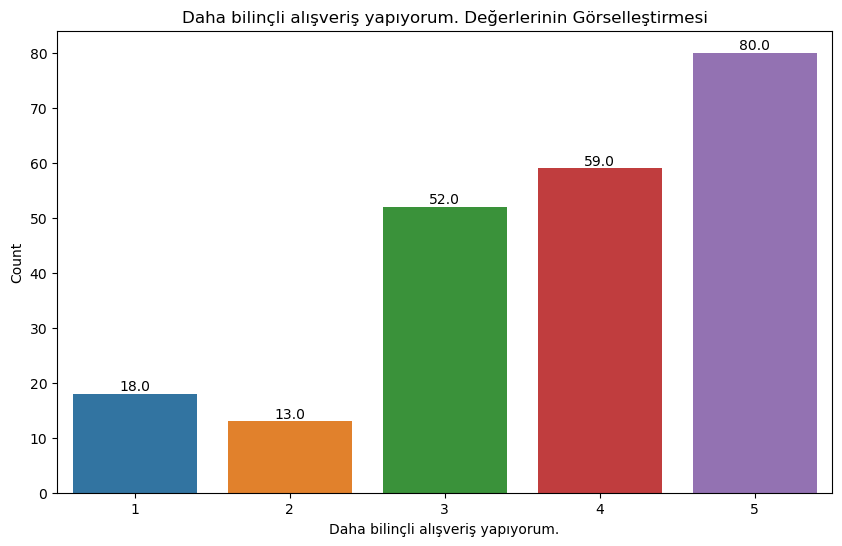

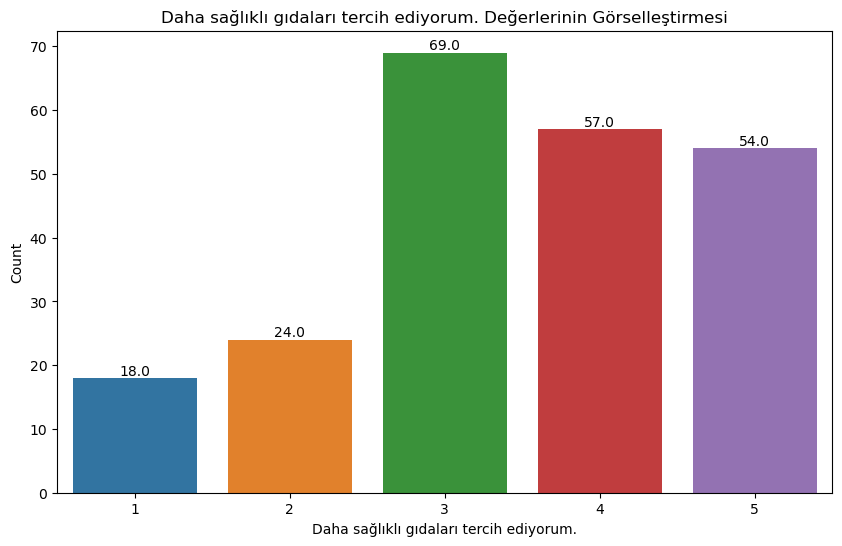

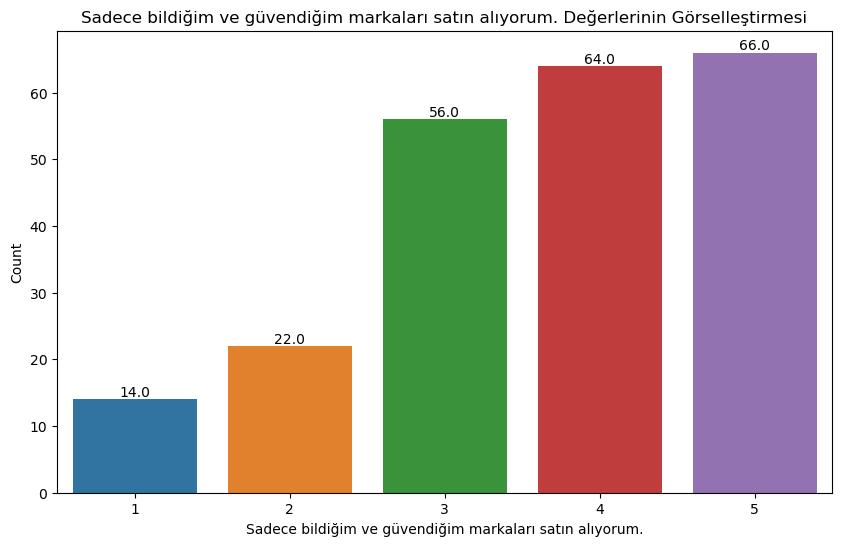

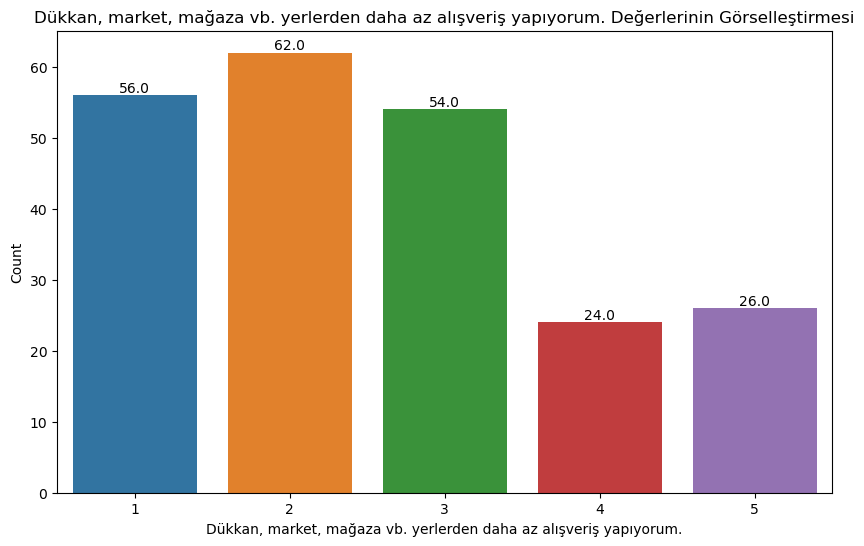

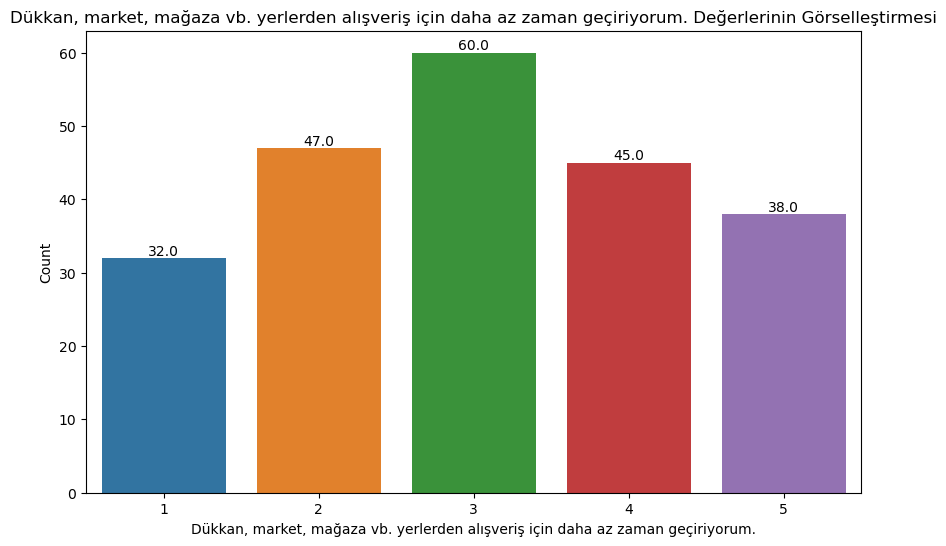

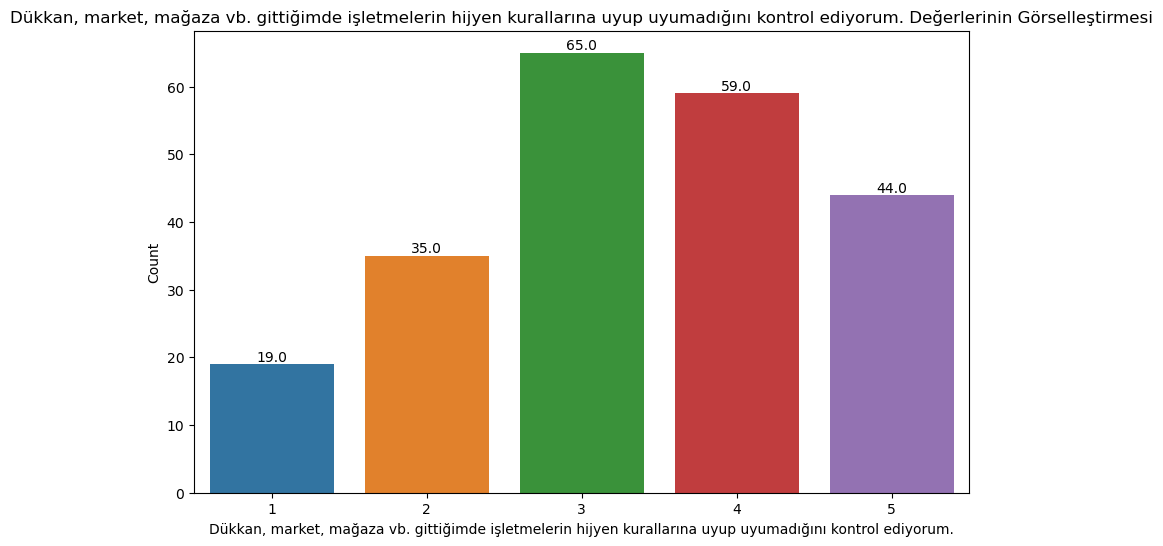

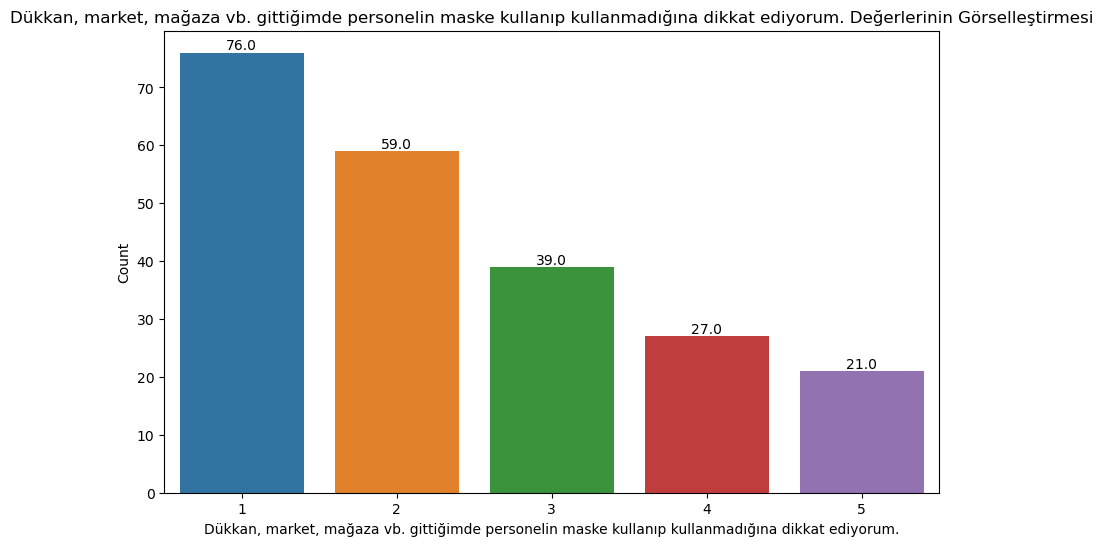

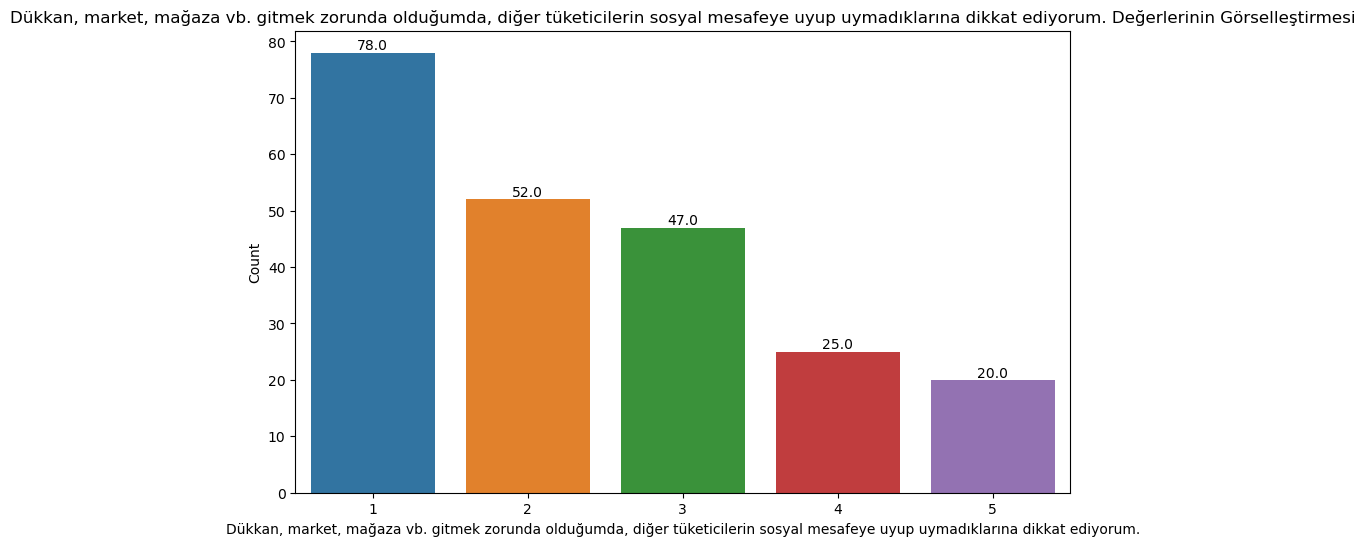

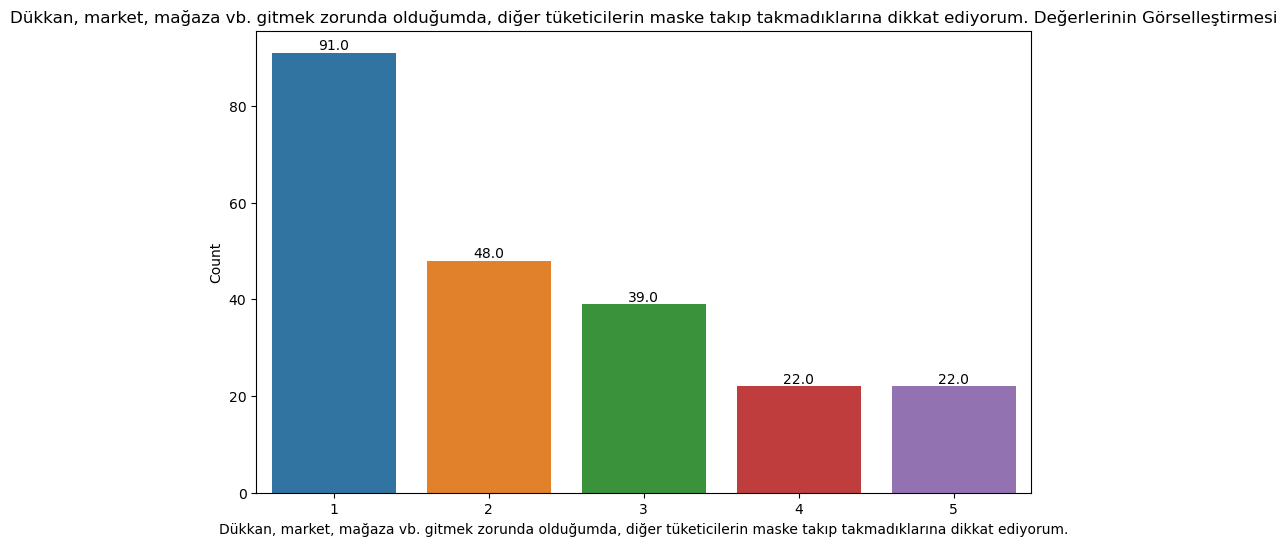

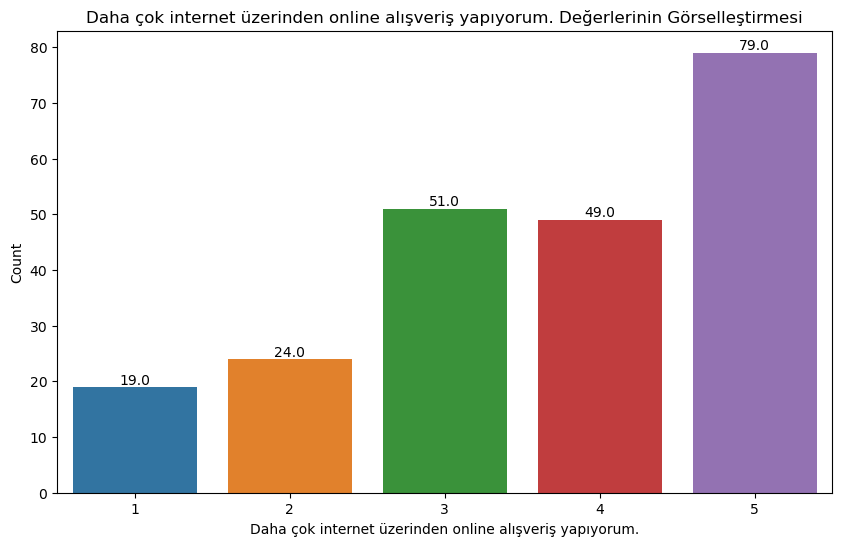

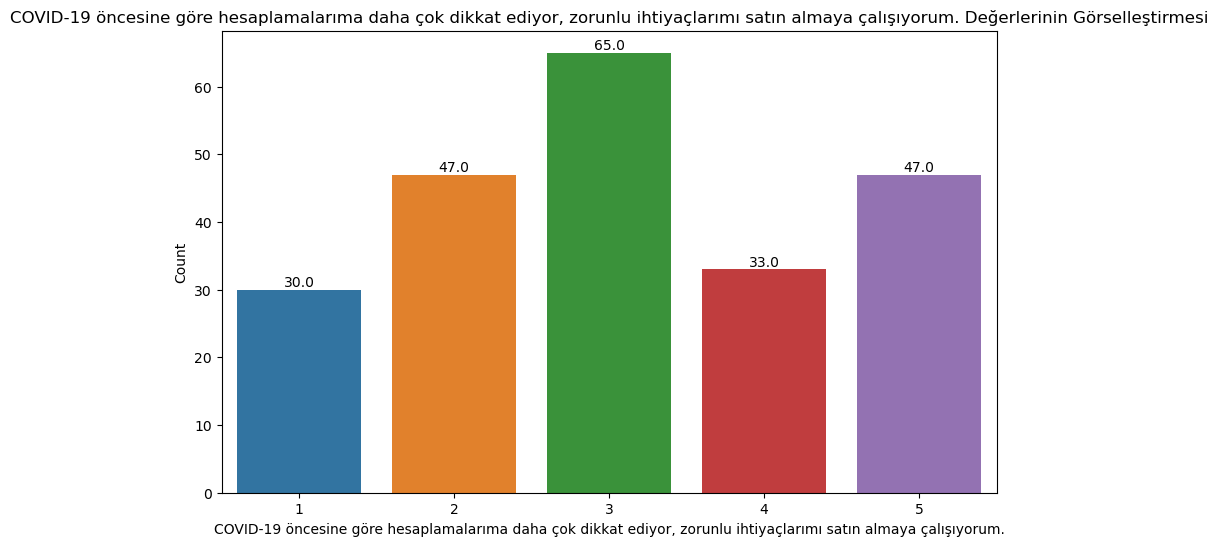

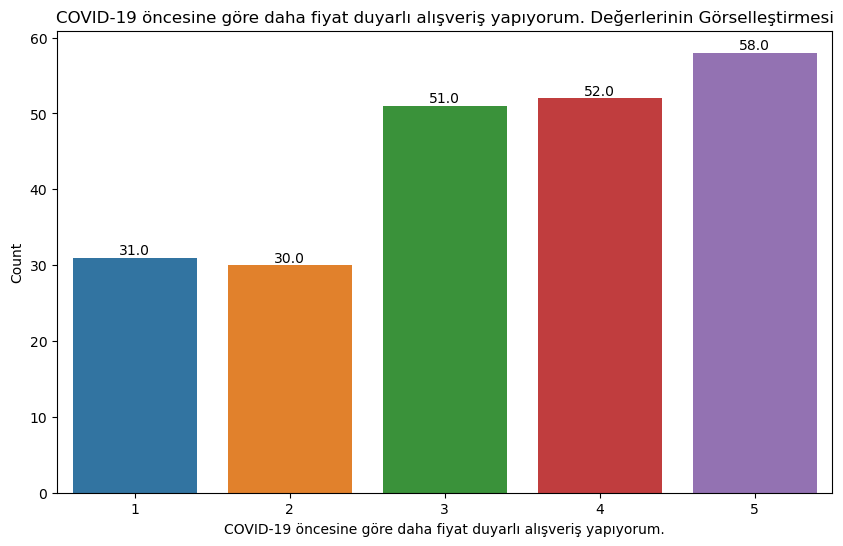

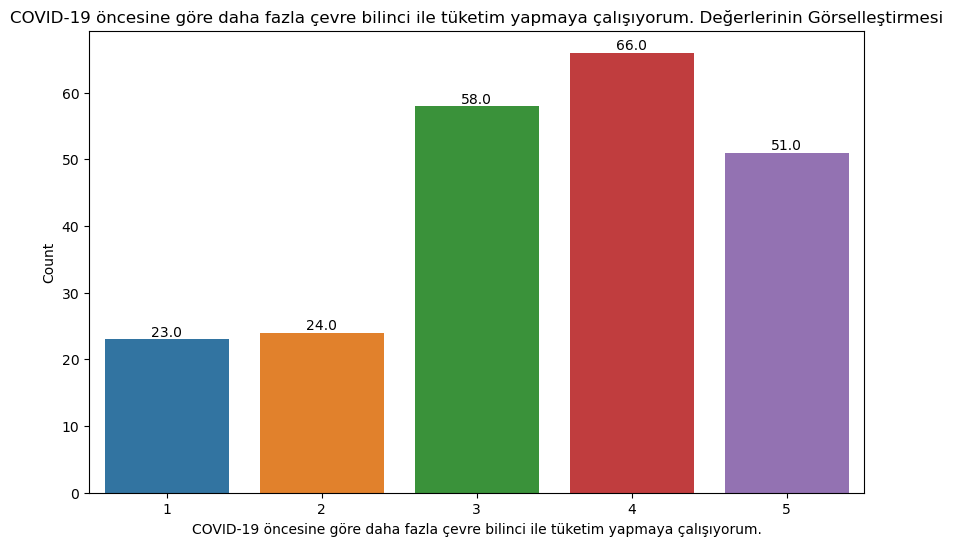

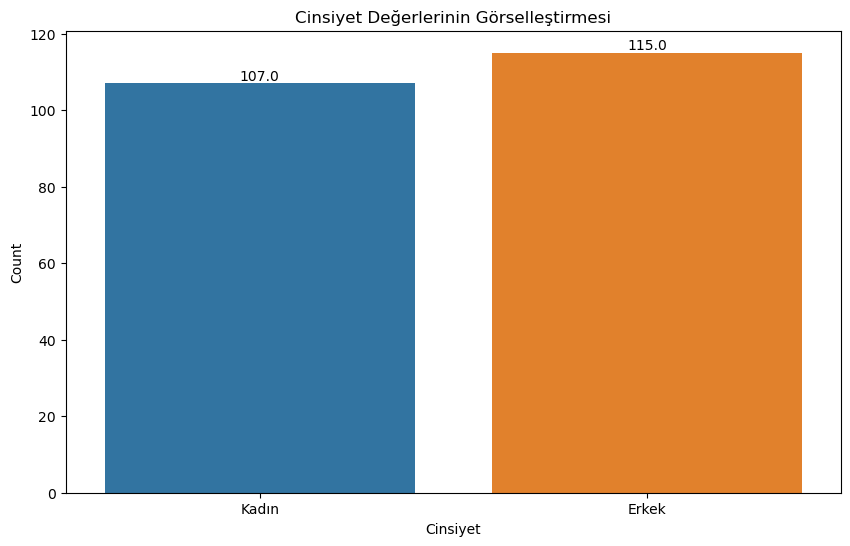

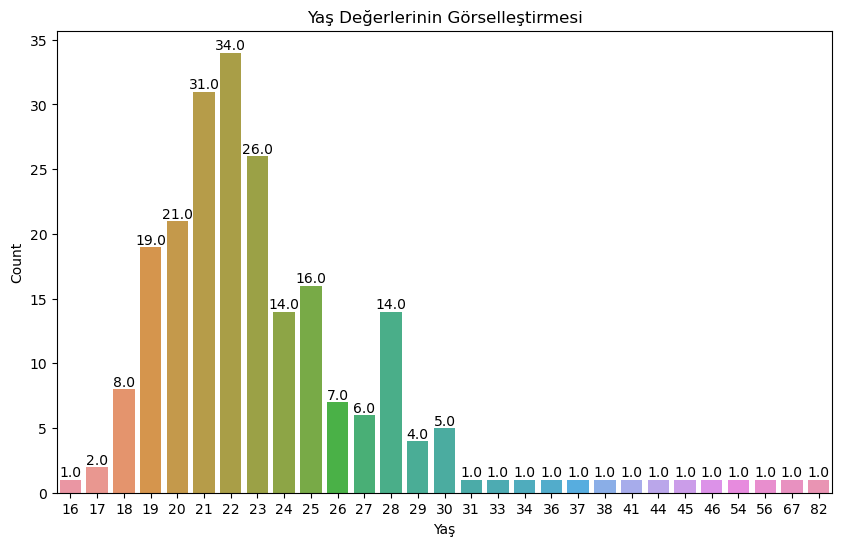

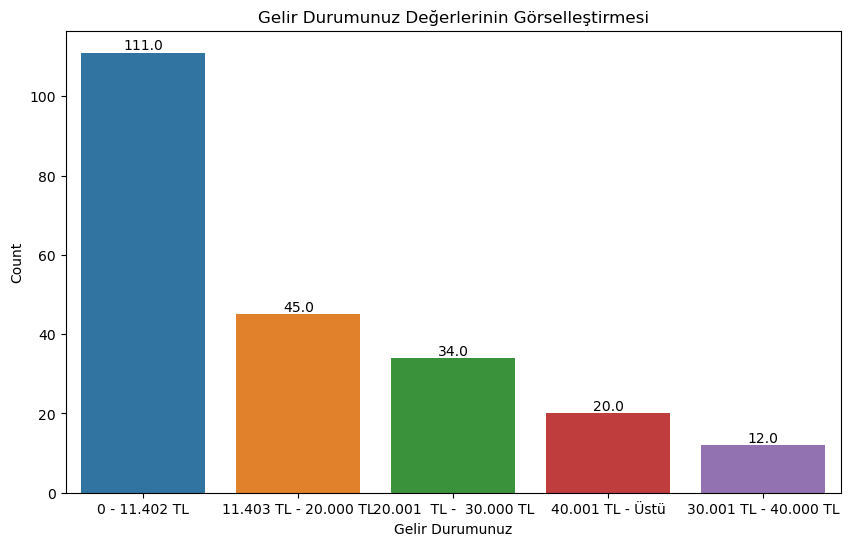

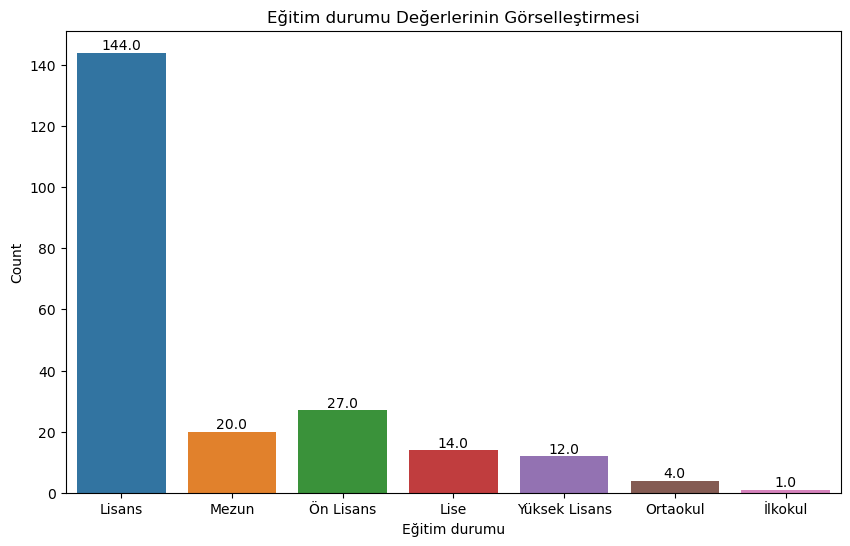

In [8]:
for column in df.columns[:18]:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, data=df)

    
    for p in plt.gca().patches:
        plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                           ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                           textcoords='offset points')

    plt.title(f"{column} Değerlerinin Görselleştirmesi")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.show()

### Değişkenlerimizin veri tipini görmek istediğimiz için dtypes ile for döngüsün sokulup kullancağımız tüm değişkenlerin tam isimleri ve veri tipleri gözlemlenmiştir

In [9]:
for column in df.columns[:18]:
        value = df[column].dtypes
        print(f"Kolon: {column}\nDeğerler:\n{value}\n")

Kolon: Gıdaları daha az israf etmeye çalışıyorum.
Değerler:
int64

Kolon: Daha bilinçli alışveriş yapıyorum.
Değerler:
int64

Kolon: Daha sağlıklı gıdaları tercih ediyorum.
Değerler:
int64

Kolon: Sadece bildiğim ve güvendiğim markaları satın alıyorum.
Değerler:
int64

Kolon: Dükkan, market, mağaza vb. yerlerden daha az alışveriş yapıyorum.
Değerler:
int64

Kolon: Dükkan, market, mağaza vb. yerlerden alışveriş için daha az zaman geçiriyorum.
Değerler:
int64

Kolon: Dükkan, market, mağaza vb. gittiğimde işletmelerin hijyen kurallarına uyup uyumadığını kontrol ediyorum.
Değerler:
int64

Kolon: Dükkan, market, mağaza vb. gittiğimde personelin maske kullanıp kullanmadığına dikkat ediyorum.
Değerler:
int64

Kolon: Dükkan, market, mağaza vb. gitmek zorunda olduğumda, diğer tüketicilerin sosyal mesafeye uyup uymadıklarına dikkat ediyorum.
Değerler:
int64

Kolon: Dükkan, market, mağaza vb. gitmek zorunda olduğumda, diğer tüketicilerin maske takıp takmadıklarına dikkat ediyorum.
Değerler:
int64

### Verimizdeki değişkenlerimizin son 5 değeri tail metodu ile gözlemlenmiştir

In [10]:
for column in df.columns[:18]:
        value = df[column].tail()
        print(f"Kolon: {column}\nDeğerler:\n{value}\n")

Kolon: Gıdaları daha az israf etmeye çalışıyorum.
Değerler:
217    3
218    4
219    3
220    2
221    4
Name: Gıdaları daha az israf etmeye çalışıyorum., dtype: int64

Kolon: Daha bilinçli alışveriş yapıyorum.
Değerler:
217    3
218    3
219    4
220    2
221    4
Name: Daha bilinçli alışveriş yapıyorum., dtype: int64

Kolon: Daha sağlıklı gıdaları tercih ediyorum.
Değerler:
217    1
218    3
219    3
220    4
221    4
Name: Daha sağlıklı gıdaları tercih ediyorum., dtype: int64

Kolon: Sadece bildiğim ve güvendiğim markaları satın alıyorum.
Değerler:
217    5
218    2
219    5
220    2
221    3
Name: Sadece bildiğim ve güvendiğim markaları satın alıyorum., dtype: int64

Kolon: Dükkan, market, mağaza vb. yerlerden daha az alışveriş yapıyorum.
Değerler:
217    5
218    2
219    3
220    4
221    2
Name: Dükkan, market, mağaza vb. yerlerden daha az alışveriş yapıyorum., dtype: int64

Kolon: Dükkan, market, mağaza vb. yerlerden alışveriş için daha az zaman geçiriyorum.
Değerler:
217    5


### Değişkenlerimizdeki boş değerlerin toplamı isnull ve sum metodları ile gözlemlenmiştir. Hiçbir değişkende boş değer bulunmamaktadır.

In [11]:
for column in df.columns[0:18]:
        value = df[column].isnull().sum()
        print(f"Kolon: {column}\nDeğerler:\n{value}\n")

Kolon: Gıdaları daha az israf etmeye çalışıyorum.
Değerler:
0

Kolon: Daha bilinçli alışveriş yapıyorum.
Değerler:
0

Kolon: Daha sağlıklı gıdaları tercih ediyorum.
Değerler:
0

Kolon: Sadece bildiğim ve güvendiğim markaları satın alıyorum.
Değerler:
0

Kolon: Dükkan, market, mağaza vb. yerlerden daha az alışveriş yapıyorum.
Değerler:
0

Kolon: Dükkan, market, mağaza vb. yerlerden alışveriş için daha az zaman geçiriyorum.
Değerler:
0

Kolon: Dükkan, market, mağaza vb. gittiğimde işletmelerin hijyen kurallarına uyup uyumadığını kontrol ediyorum.
Değerler:
0

Kolon: Dükkan, market, mağaza vb. gittiğimde personelin maske kullanıp kullanmadığına dikkat ediyorum.
Değerler:
0

Kolon: Dükkan, market, mağaza vb. gitmek zorunda olduğumda, diğer tüketicilerin sosyal mesafeye uyup uymadıklarına dikkat ediyorum.
Değerler:
0

Kolon: Dükkan, market, mağaza vb. gitmek zorunda olduğumda, diğer tüketicilerin maske takıp takmadıklarına dikkat ediyorum.
Değerler:
0

Kolon: Daha çok internet üzerinden onl

### Describe metodu ile değişkenlerimizin temel istatistiksel değerleri gözlemlenmiştir. Bu metod ile verilerin merkezi eğilimi, yayılımı ve dağılımı hakkında bilgi edinmiş oluyoruz.

* count: Gözlemlerin sayısı
* mean: Ortalama değer
* std: Standart sapma
* min: Minimum değer
* %1 : %1'lik değer
* %5 : %5'lik değer 
* %25: 1. çeyrek (Q1)
* %50: Medyan (Q2)
* %75: 3. çeyrek (Q3)
* %99: %99'luk değer
* min: Minimum değer
* max: Maksimum değer


In [12]:
for column in df.columns[:18]:
        value = df[column].describe([0.01, 0.05, 0.25, 0.50, 0.75, 0.99]).T
        print(f"Kolon: {column}\nDeğerler:\n{value}\n")

Kolon: Gıdaları daha az israf etmeye çalışıyorum.
Değerler:
count    222.000000
mean       3.765766
std        1.293597
min        1.000000
1%         1.000000
5%         1.000000
25%        3.000000
50%        4.000000
75%        5.000000
99%        5.000000
max        5.000000
Name: Gıdaları daha az israf etmeye çalışıyorum., dtype: float64

Kolon: Daha bilinçli alışveriş yapıyorum.
Değerler:
count    222.000000
mean       3.765766
std        1.229023
min        1.000000
1%         1.000000
5%         1.000000
25%        3.000000
50%        4.000000
75%        5.000000
99%        5.000000
max        5.000000
Name: Daha bilinçli alışveriş yapıyorum., dtype: float64

Kolon: Daha sağlıklı gıdaları tercih ediyorum.
Değerler:
count    222.000000
mean       3.472973
std        1.202068
min        1.000000
1%         1.000000
5%         1.000000
25%        3.000000
50%        3.500000
75%        4.000000
99%        5.000000
max        5.000000
Name: Daha sağlıklı gıdaları tercih ediyorum., 

### Verilerin frekanslarının verinin toplamının yüzde kaçlık kısmına denk geldiğini hesaplıyoruz ve bunun için bir fonksiyon yazıyoruz ve for döngüsünden yararlanıyoruz.

In [13]:
def cat_summary(dataframe, col_name):
    print(pd.DataFrame({"Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)})) 
    print("############################")

In [14]:
for column in df.columns[:18]:
    cat_summary(df, column)

                                                Ratio
Gıdaları daha az israf etmeye çalışıyorum.           
5                                           39.639640
4                                           22.972973
3                                           20.720721
1                                            9.009009
2                                            7.657658
############################
                                        Ratio
Daha bilinçli alışveriş yapıyorum.           
5                                   36.036036
4                                   26.576577
3                                   23.423423
1                                    8.108108
2                                    5.855856
############################
                                             Ratio
Daha sağlıklı gıdaları tercih ediyorum.           
3                                        31.081081
4                                        25.675676
5                                     

### Değişkenlerimizi yaşa göre gruplayıp(groupby) ortlamalarını alıyoruz, seçtiğimiz kolonlarımıza uygulayabilmek için döngüye sokuyoruz, görselleştirmelerini yapıyoruz ve yazdığımız fonksiyonu çağırıyoruz. Burada amacımız COVİD-19'un bireylerin tüketim davranışları üzerindeki etkileri yaşlara göre farklılık gösteriyor mu? Sorusuna cevap aramaktır. Bu yüzden cevapların ortlamaları alınarak görselleştirilmiştir.

In [15]:
def visualize_groupby(df, groupby_column):
    numeric_columns = df.select_dtypes(include='number').columns

    for column in numeric_columns:
        grouped_data = df.groupby(groupby_column,as_index=False)[column].mean()

        plt.figure(figsize=(10, 6))
        sns.barplot(x=groupby_column, y=column, data=grouped_data)
        
        
        for p in plt.gca().patches:
            plt.gca().annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                       textcoords='offset points')
    
        plt.title(f'{column} - {groupby_column} Gruplaması')
        plt.xlabel(groupby_column)
        plt.ylabel(f'Mean {column}')
        plt.show()

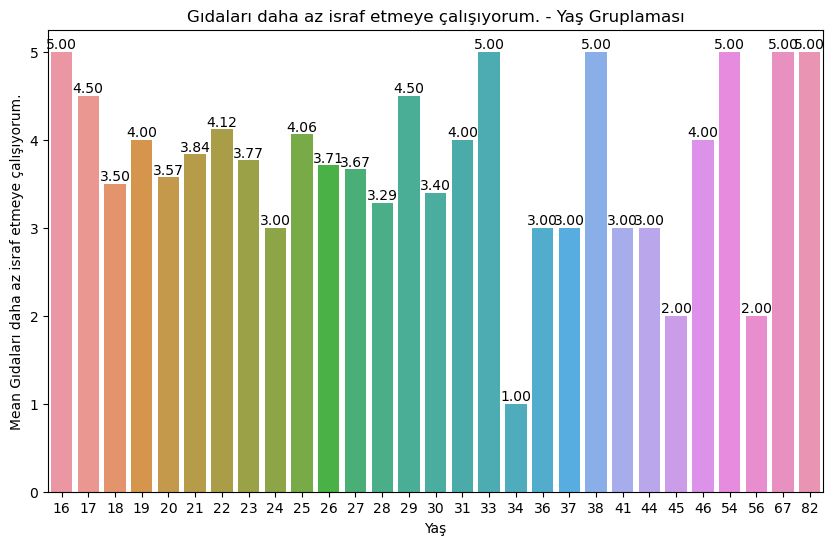

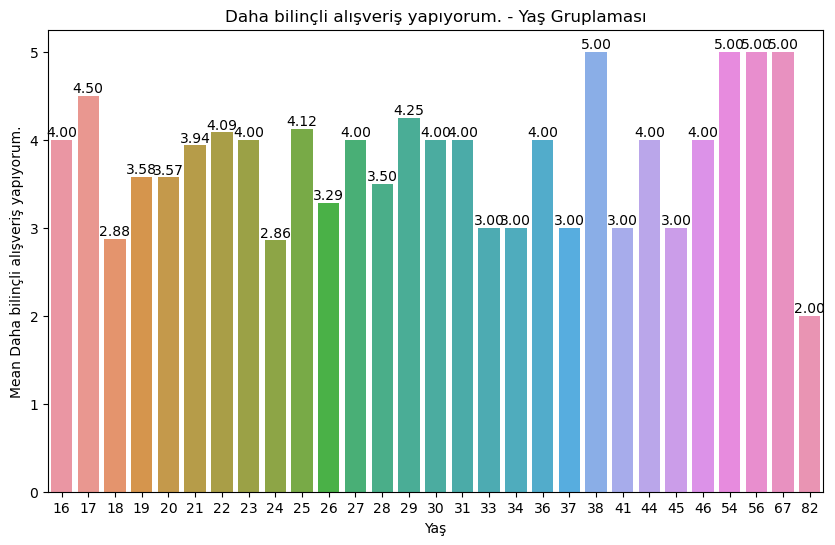

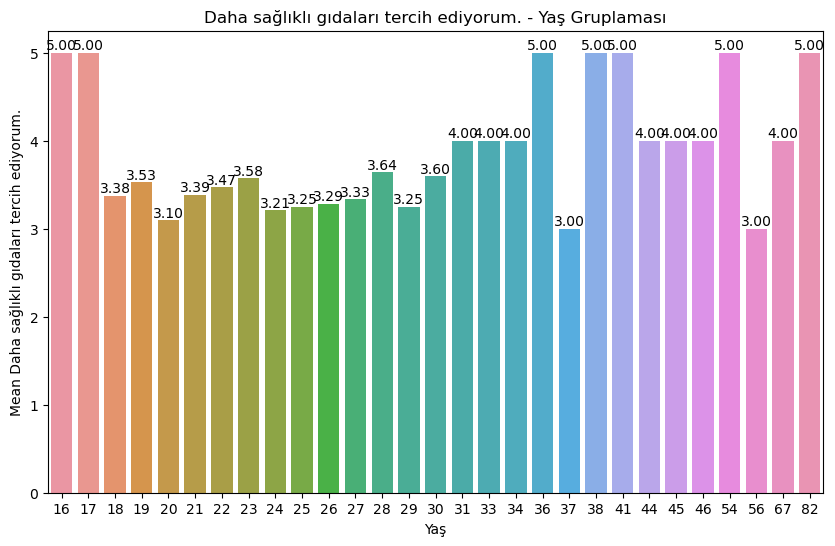

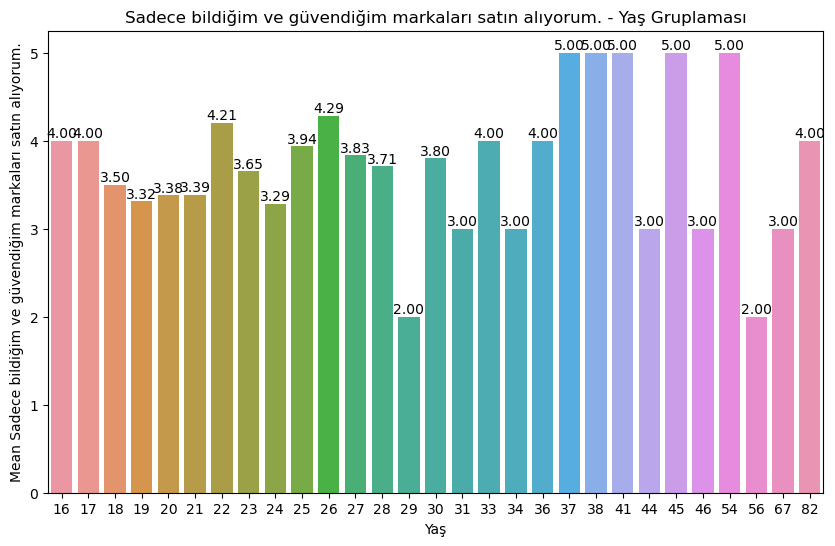

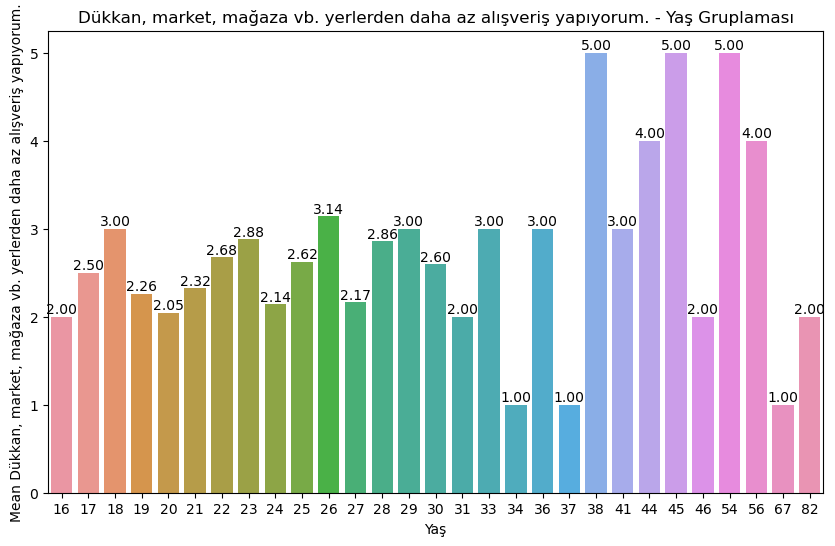

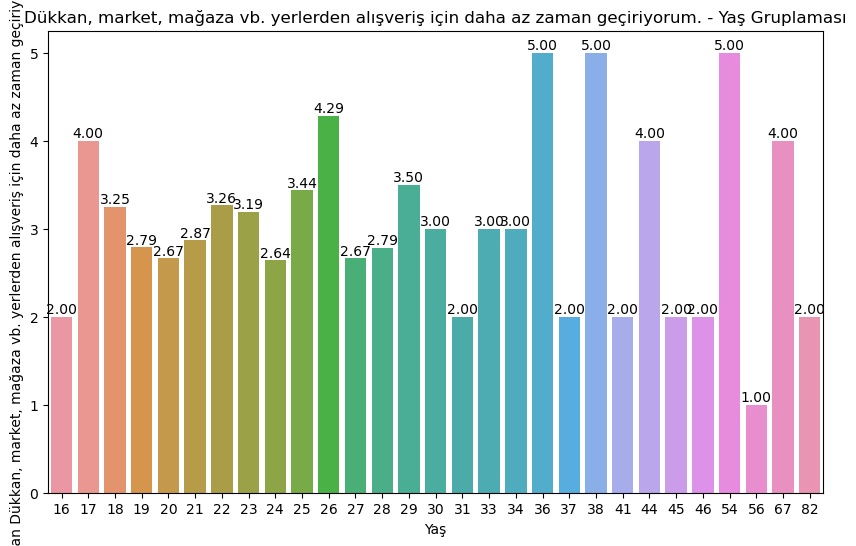

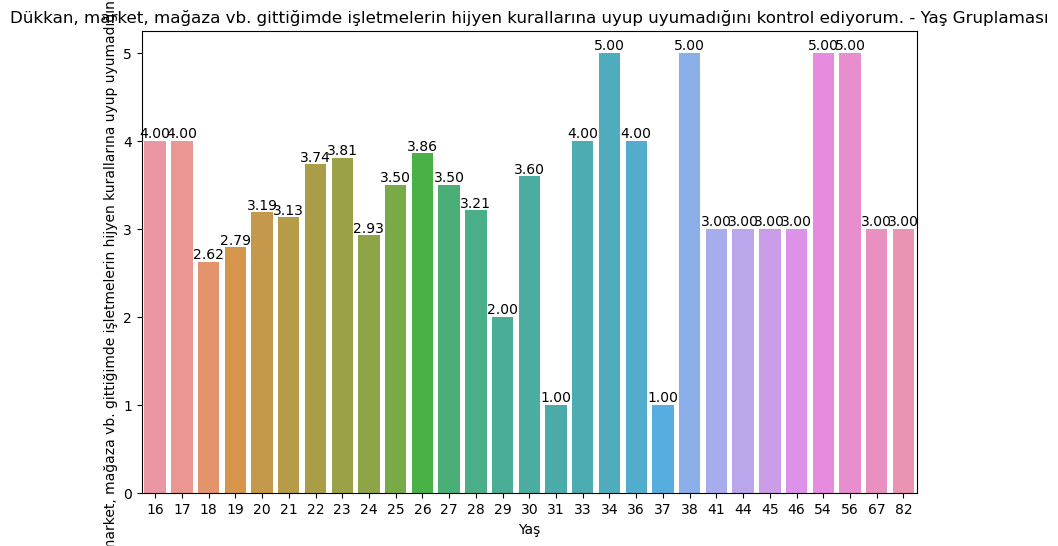

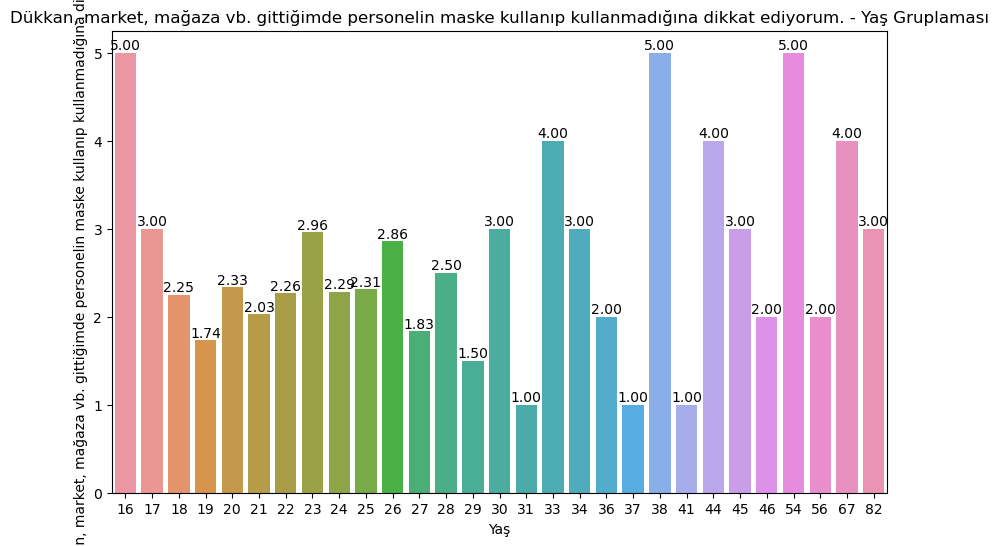

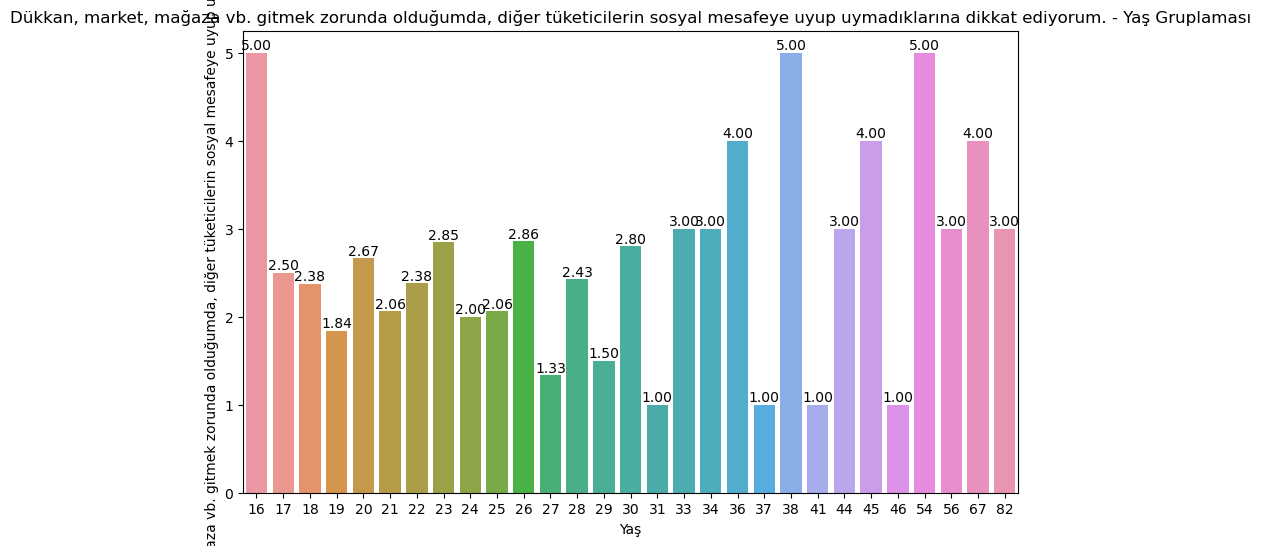

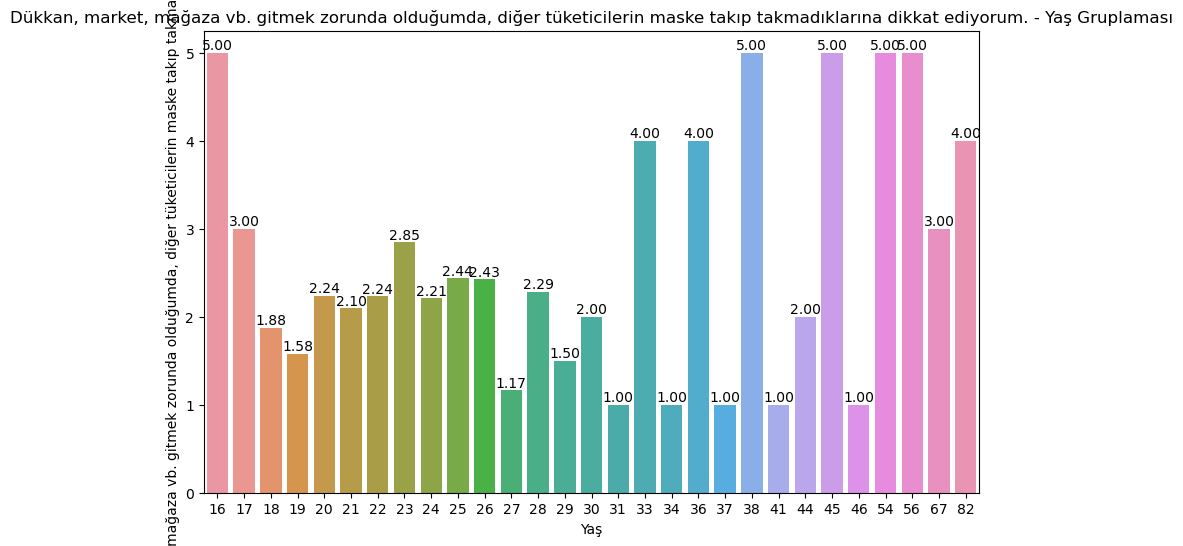

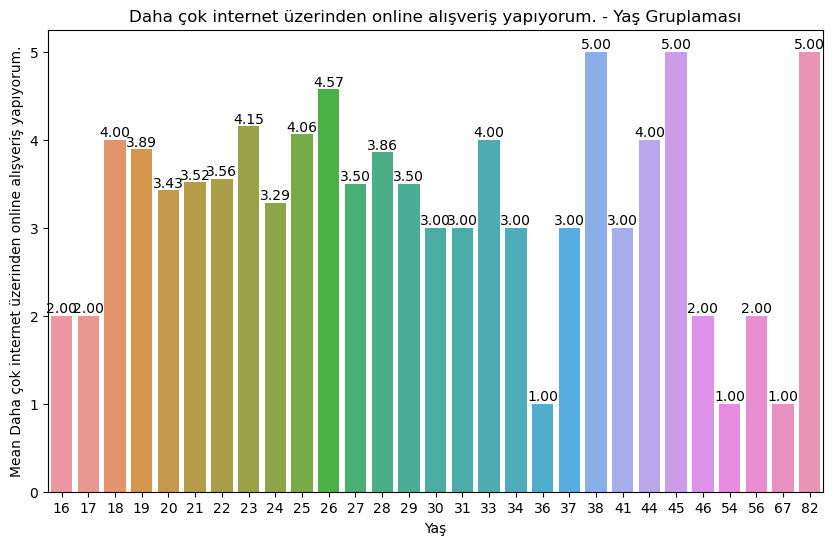

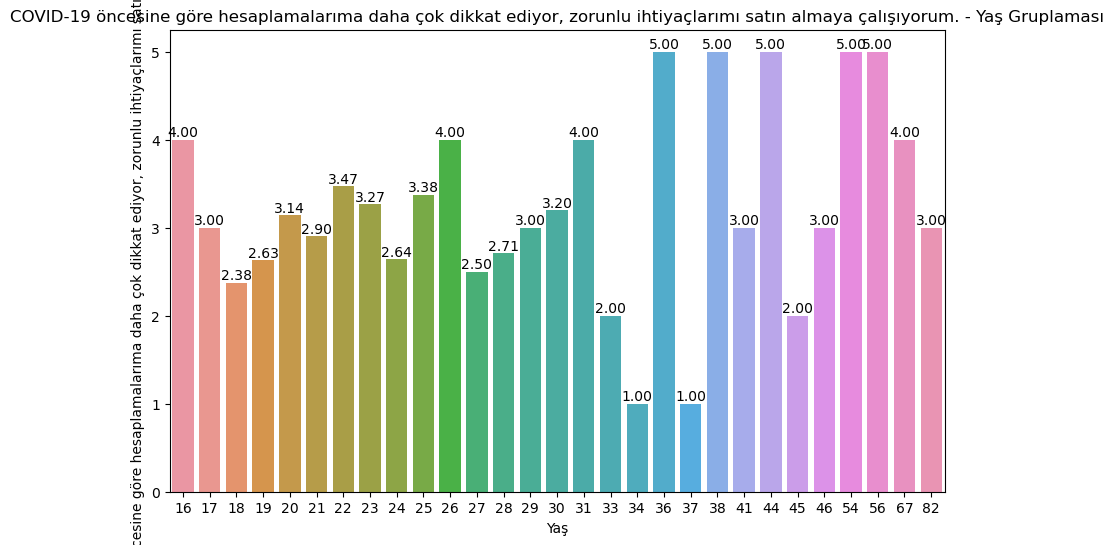

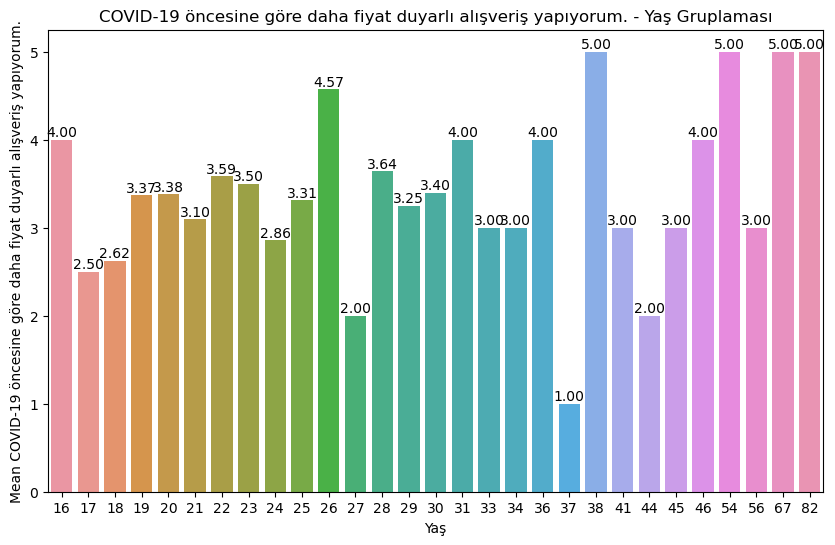

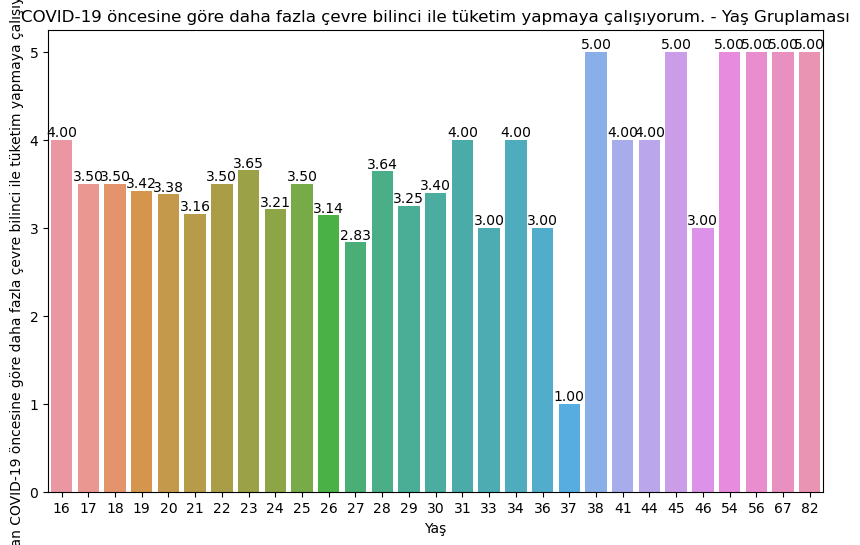

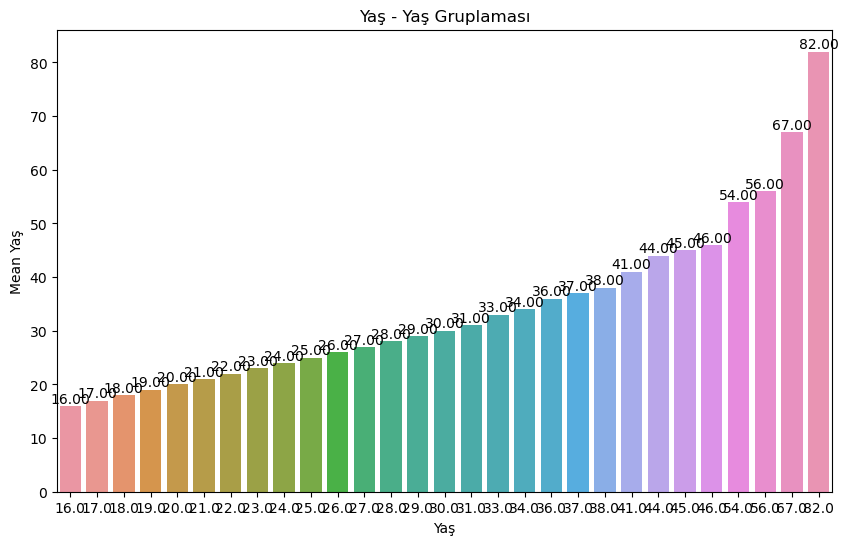

In [16]:
visualize_groupby(df, "Yaş")

### Daha kolay  işlem yapabilmek için cinsiyet kolonu label encod edilmiştir

In [17]:
label_encoder = LabelEncoder()
df['Cinsiyet_LabelEncoded'] = label_encoder.fit_transform(df['Cinsiyet'])
df

Gıdaları daha az israf etmeye çalışıyorum.  \
0                                             4   
1                                             5   
2                                             4   
3                                             5   
4                                             3   
..                                          ...   
217                                           3   
218                                           4   
219                                           3   
220                                           2   
221                                           4   

     Daha bilinçli alışveriş yapıyorum.  \
0                                     4   
1                                     5   
2                                     3   
3                                     5   
4                                     1   
..                                  ...   
217                                   3   
218                                   3   
219                                   4   
220                                   2   
221                                   4   

     Daha sağlıklı gıdaları tercih ediyorum.  \
0                                          2   
1                                          4   
2                                          5   
3                                          5   
4                                          1   
..                                       ...   
217                                        1   
218                                        3   
219                                        3   
220                                        4   
221                                        4   

     Sadece bildiğim ve güvendiğim markaları satın alıyorum.  \
0                                                    4         
1                                                    4         
2                                                    4         
3                                                    5         
4                                                    5         
..                                                 ...         
217                                                  5         
218                                                  2         
219                                                  5         
220                                                  2         
221                                                  3         

     Dükkan, market, mağaza vb. yerlerden daha az alışveriş yapıyorum.  \
0                                                    5                   
1                                                    4                   
2                                                    3                   
3                                                    5                   
4                                                    2                   
..                                                 ...                   
217                                                  5                   
218                                                  2                   
219                                                  3                   
220                                                  4                   
221                                                  2                   

     Dükkan, market, mağaza vb. yerlerden alışveriş için daha az zaman geçiriyorum.  \
0                                                    5                                
1                                                    3                                
2                                                    3                                
3                                                    5                                
4                                                    4                                
..                                                 ...                                
217                            

### Burada da cinsiyete göre fonksiyonumuz çalıştırıyoruz. Buradaki amacımız, COVİD-19'un bireylerin tüketim davranışları üzerindeki etkileri cinsiyetlere göre farklılık gösteriyor mu? Sorusuna yanıt aramaktır. Analizlerin sonucu görselleştirilmiştir.

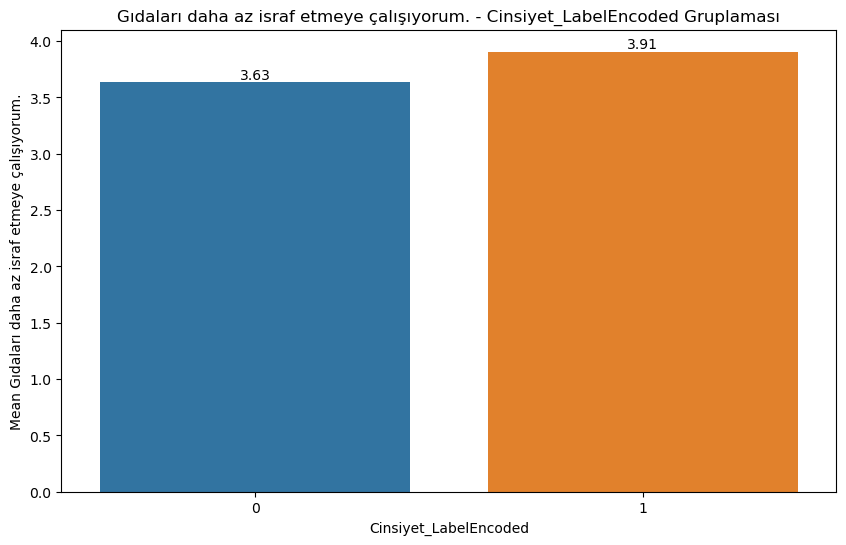

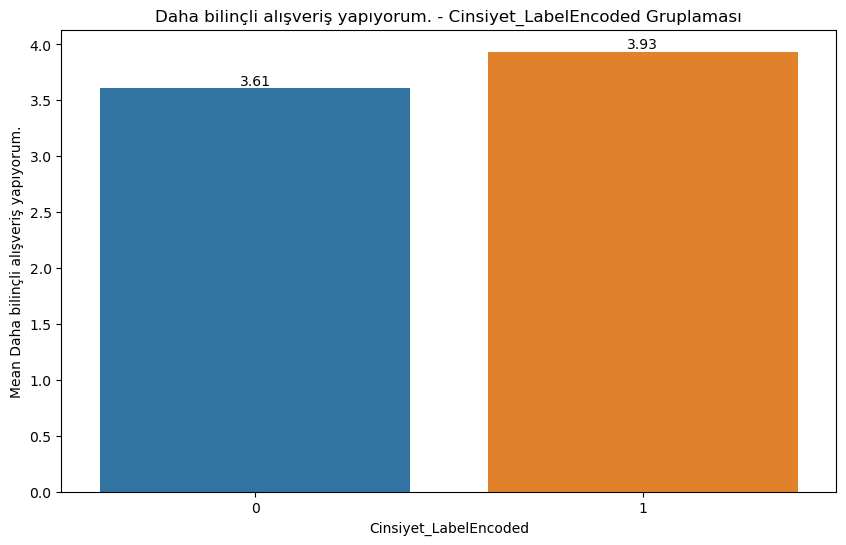

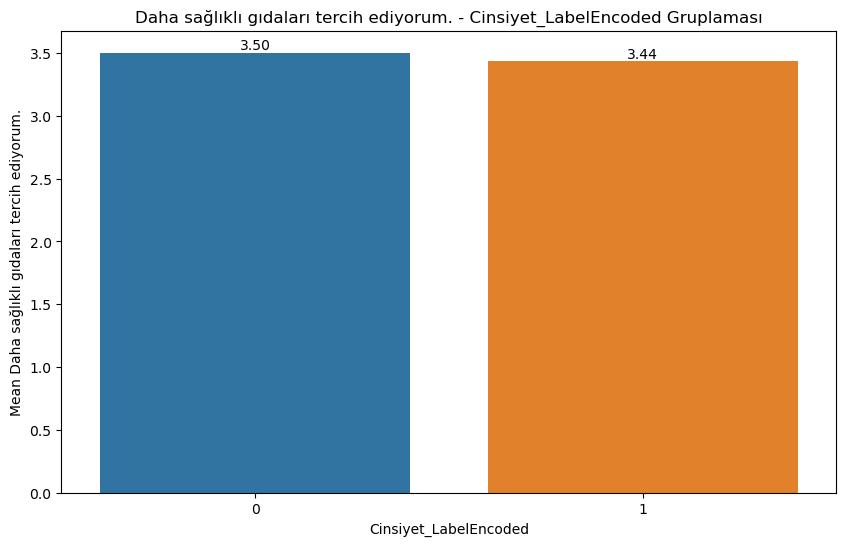

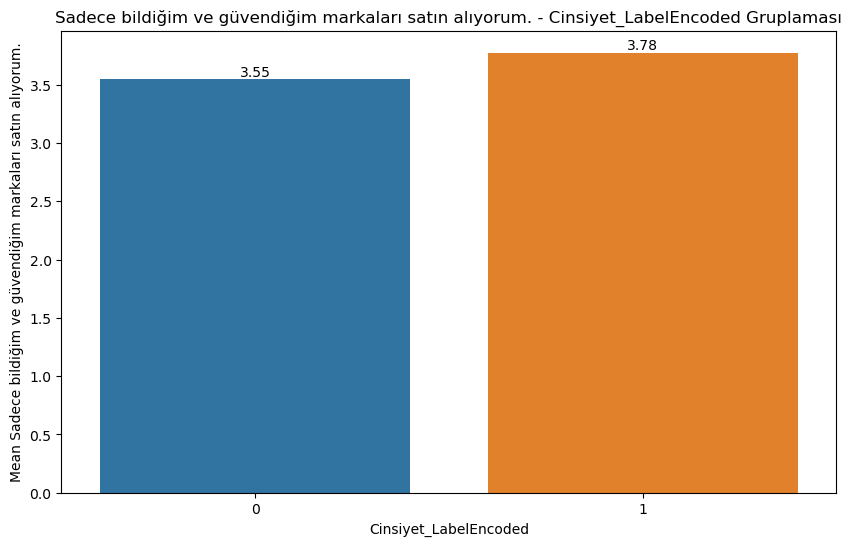

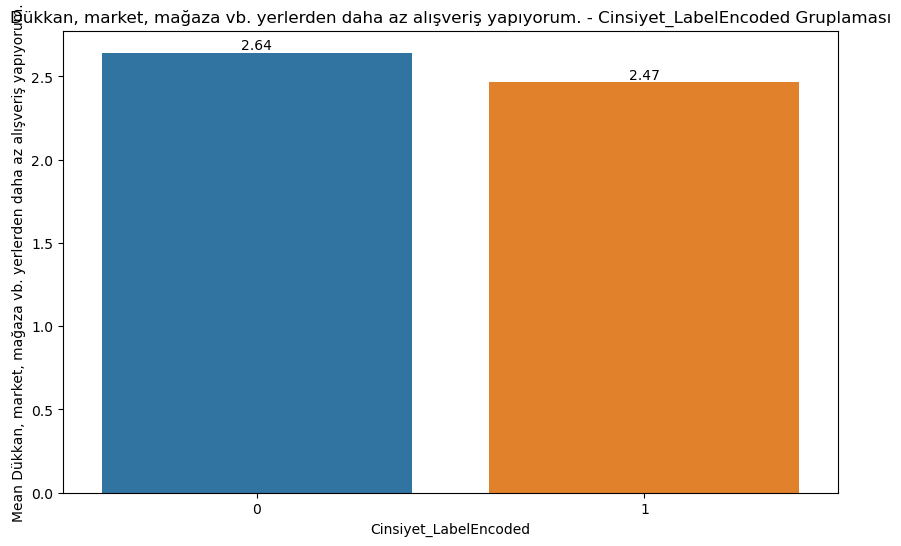

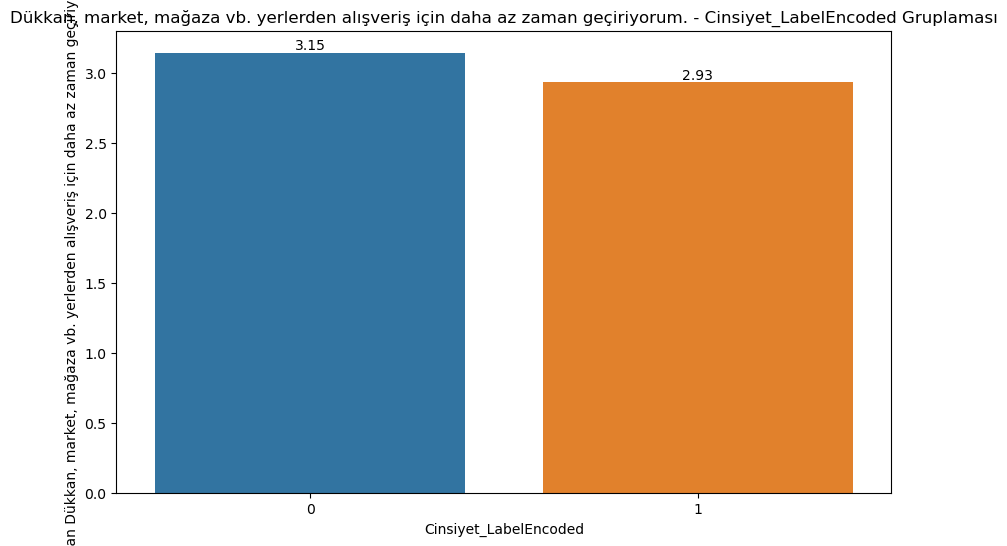

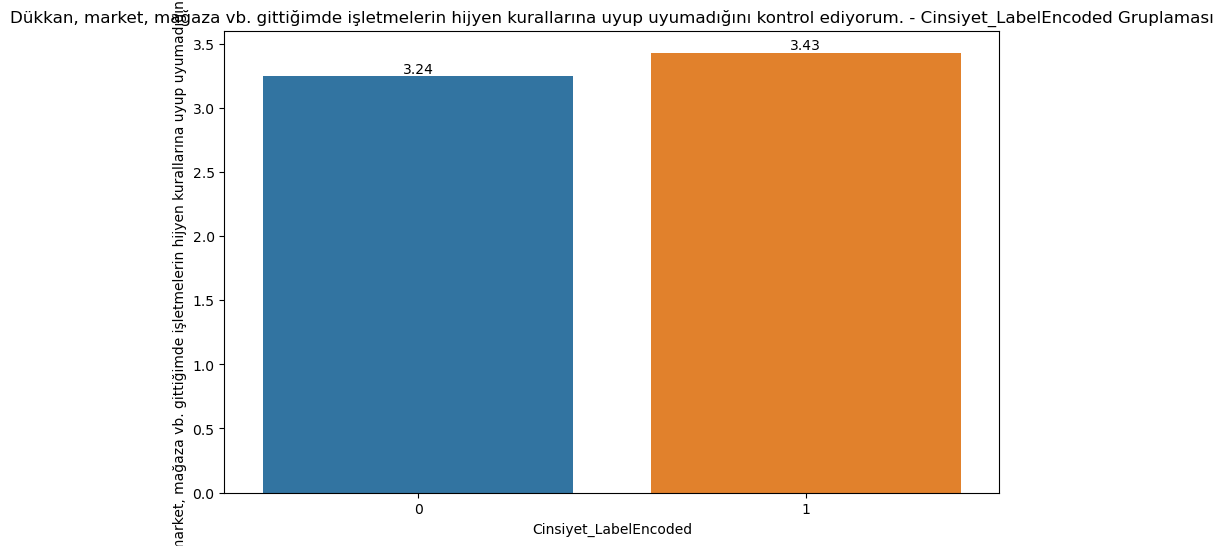

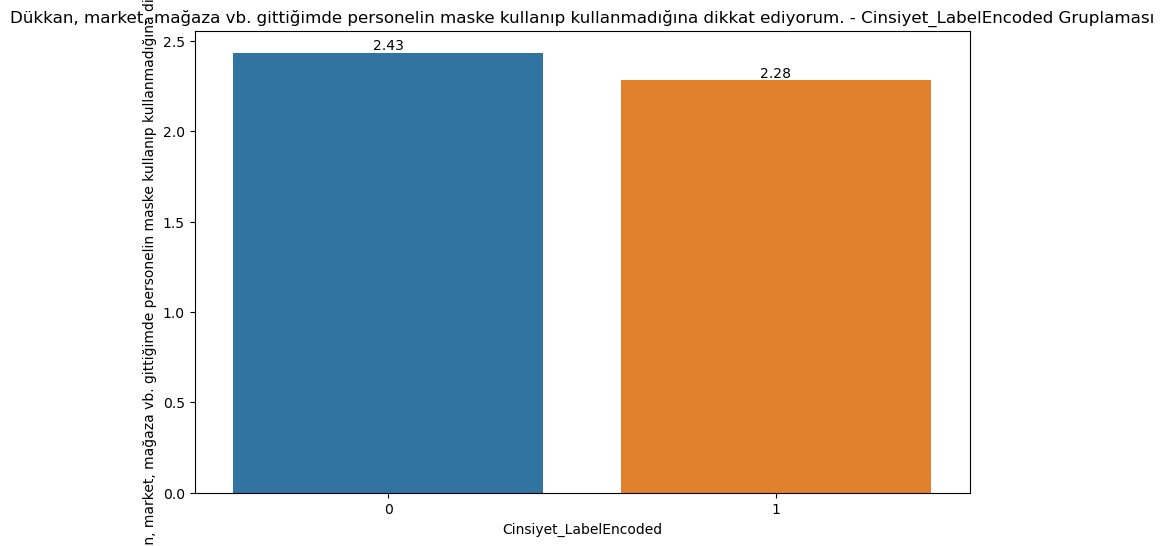

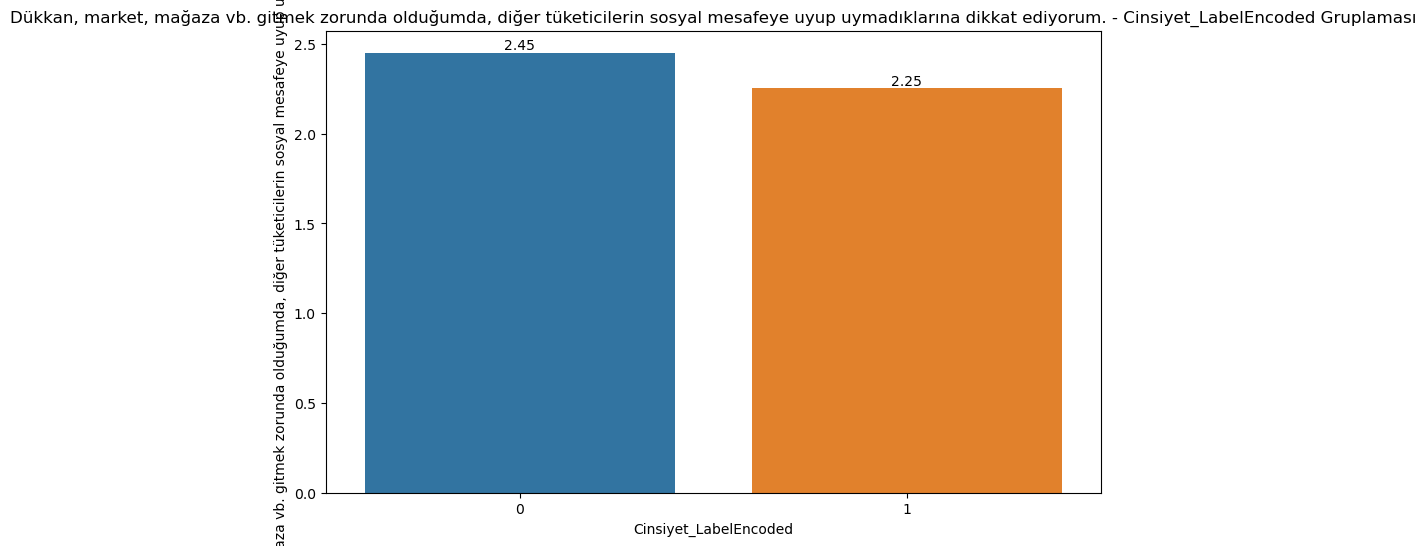

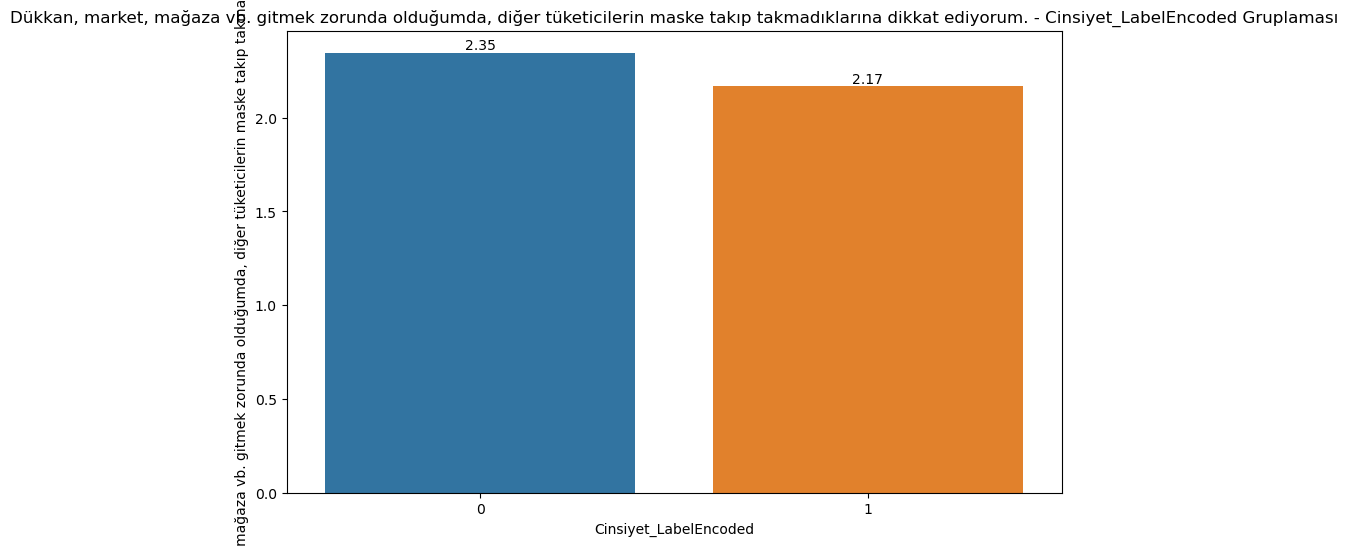

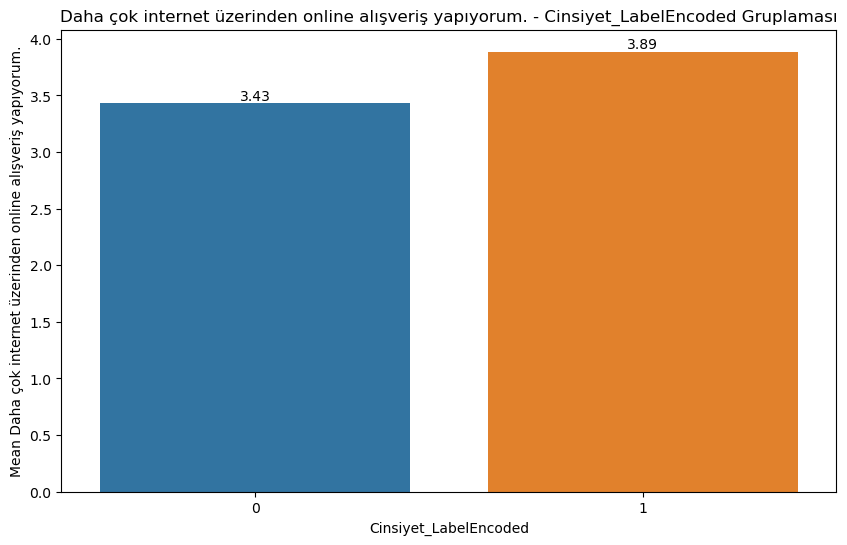

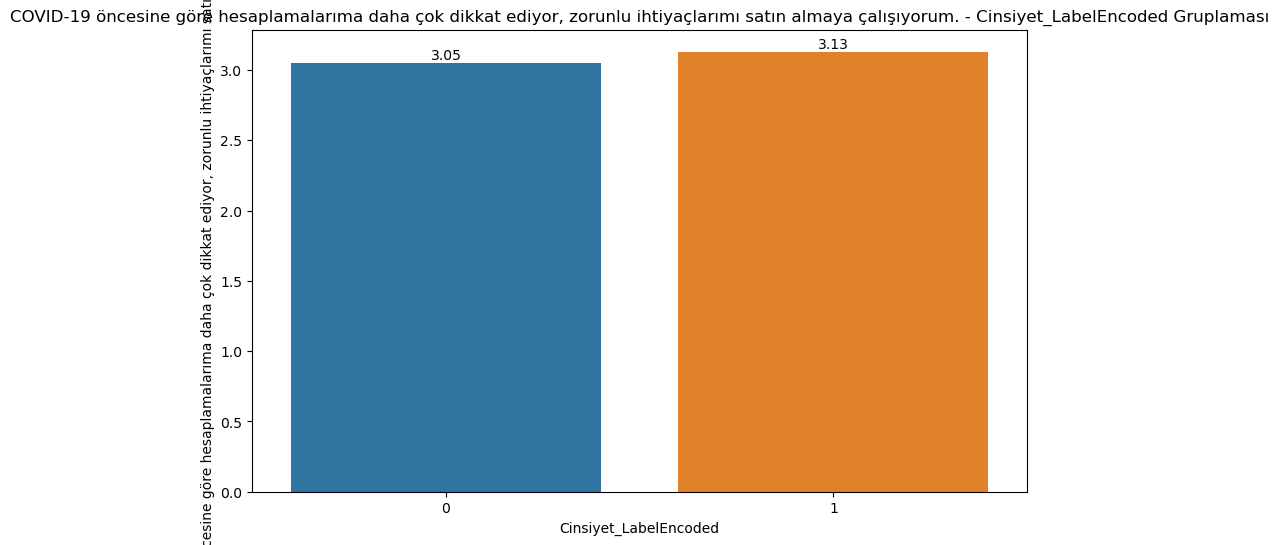

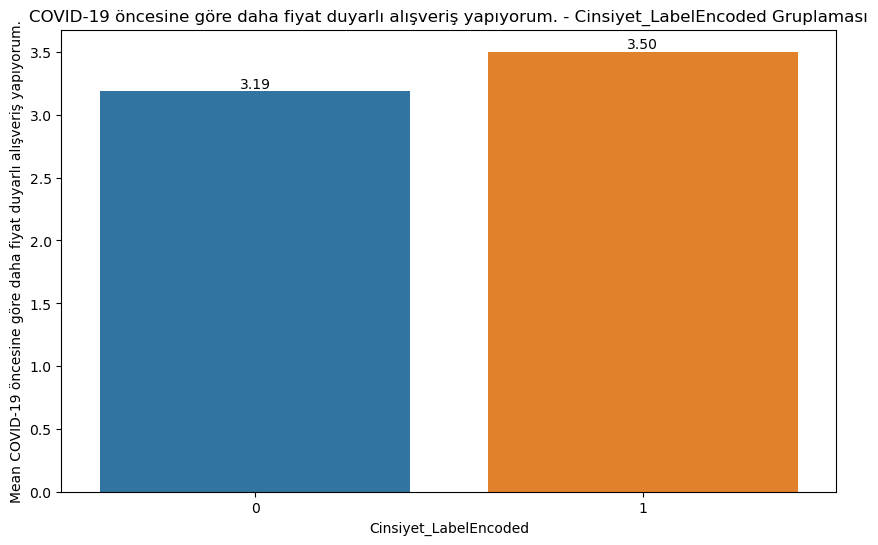

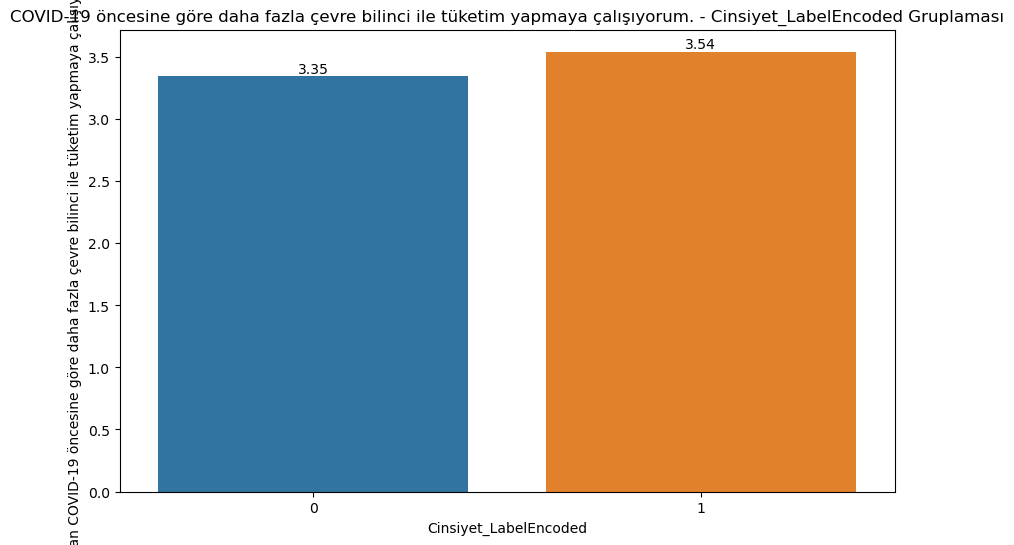

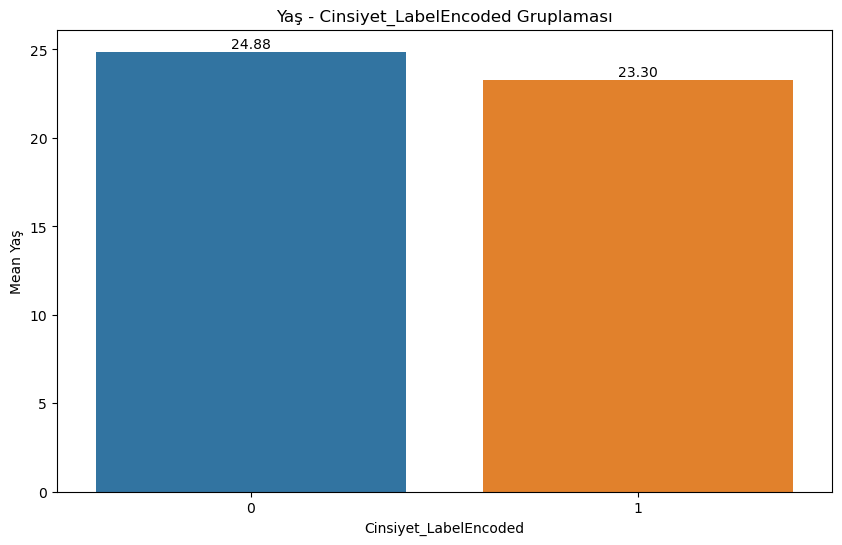

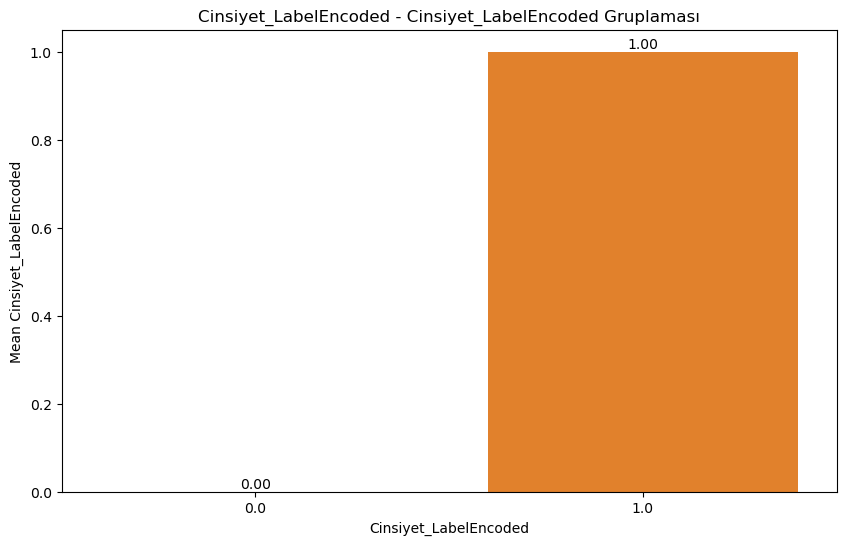

In [18]:
visualize_groupby(df, "Cinsiyet_LabelEncoded")

### Burada Gelir Durumuna göre fonksiyonumuzu çağırıyoruz. Buradaki amacımız da COVİD-19'un bireylerin tüketim davranışları üzerindeki etkileri gelirlerine göre farklılık gösteriyor mu? Sorusuna cevap aramaktır. Analiz sonuçları görselleştirilmiştir.

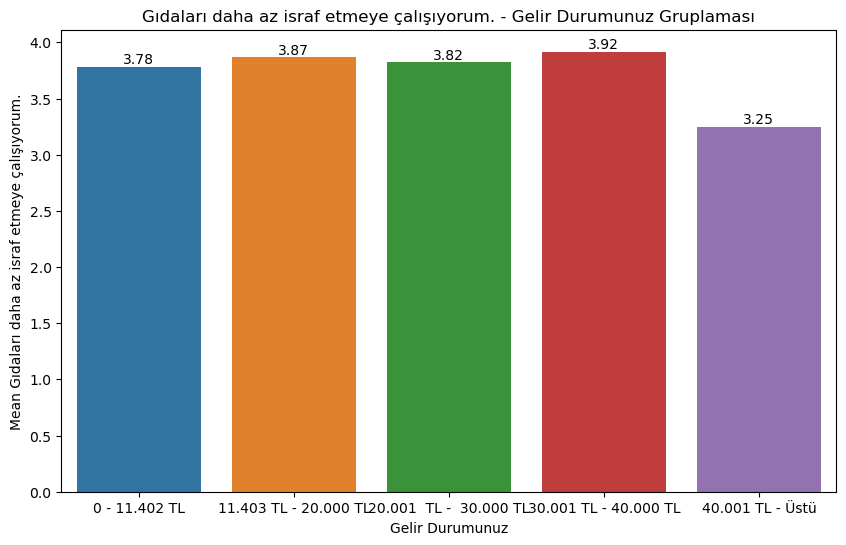

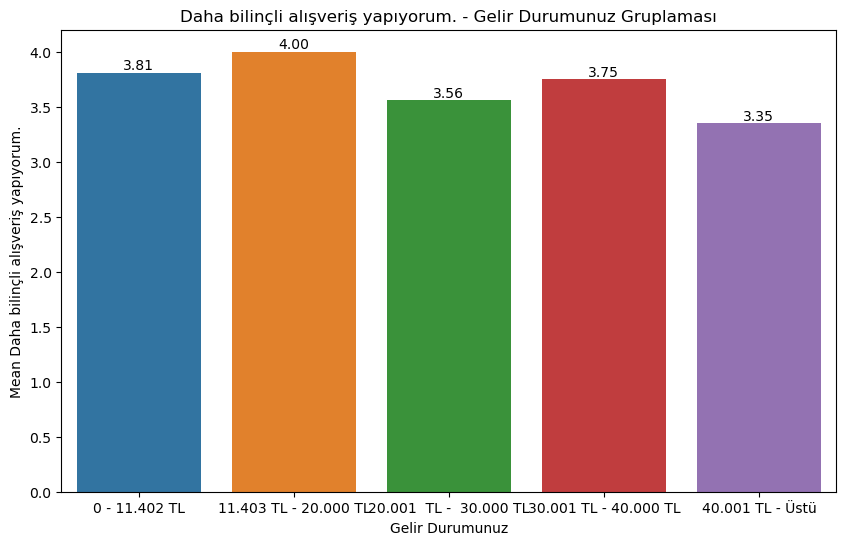

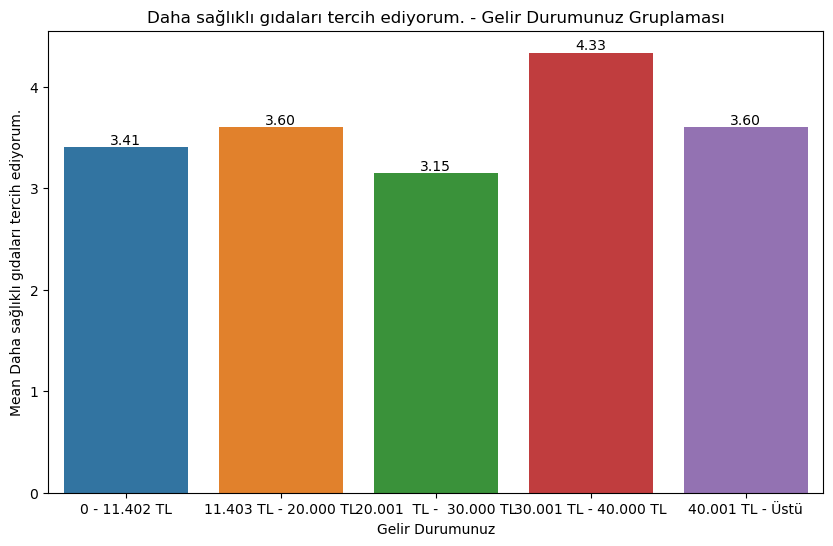

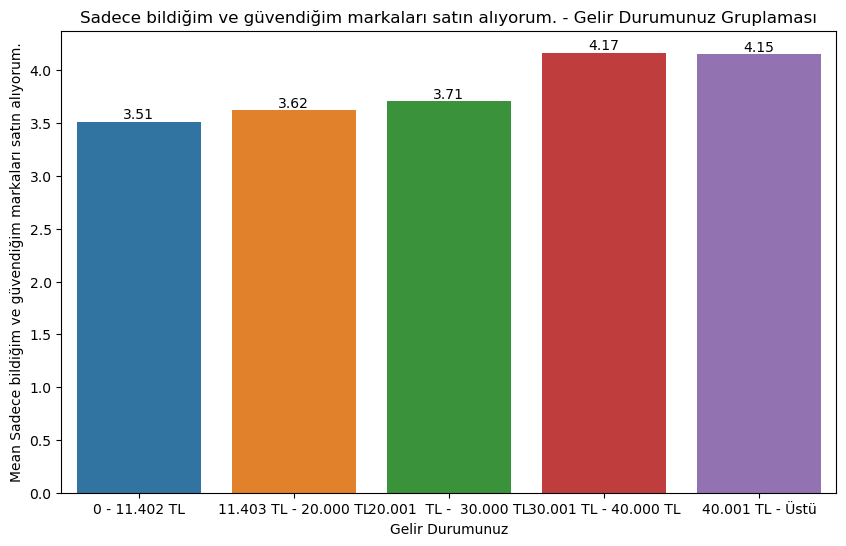

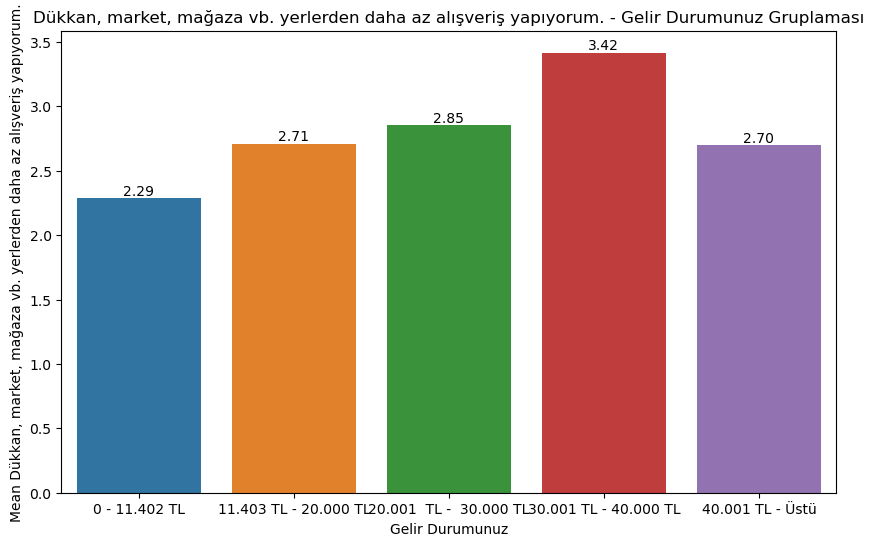

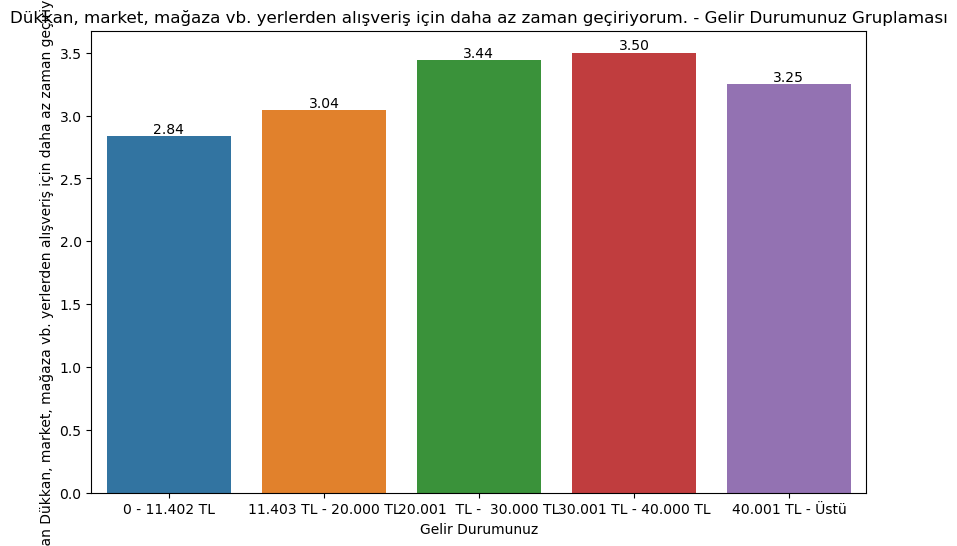

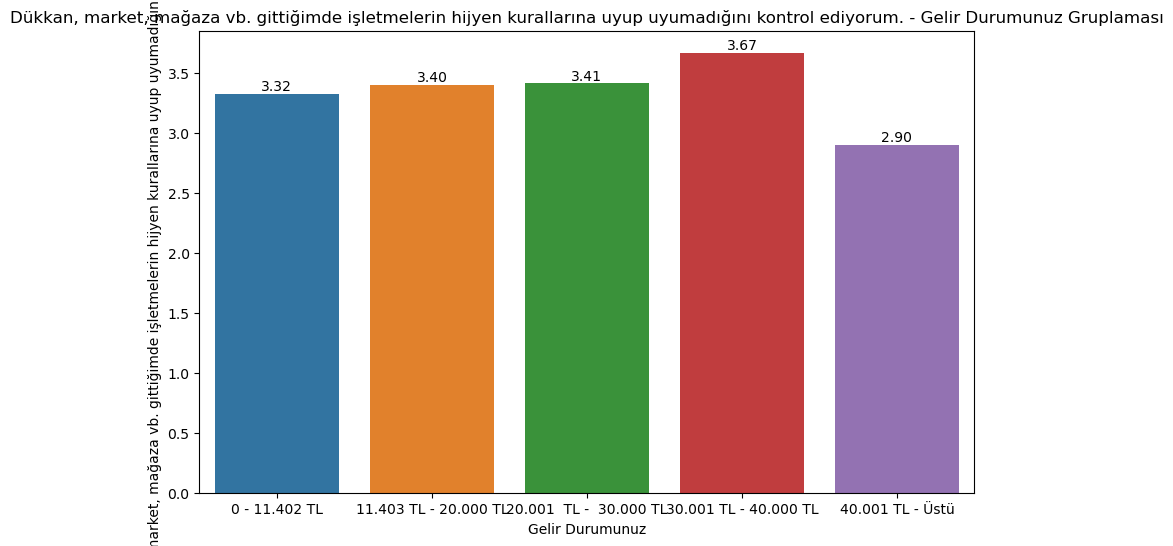

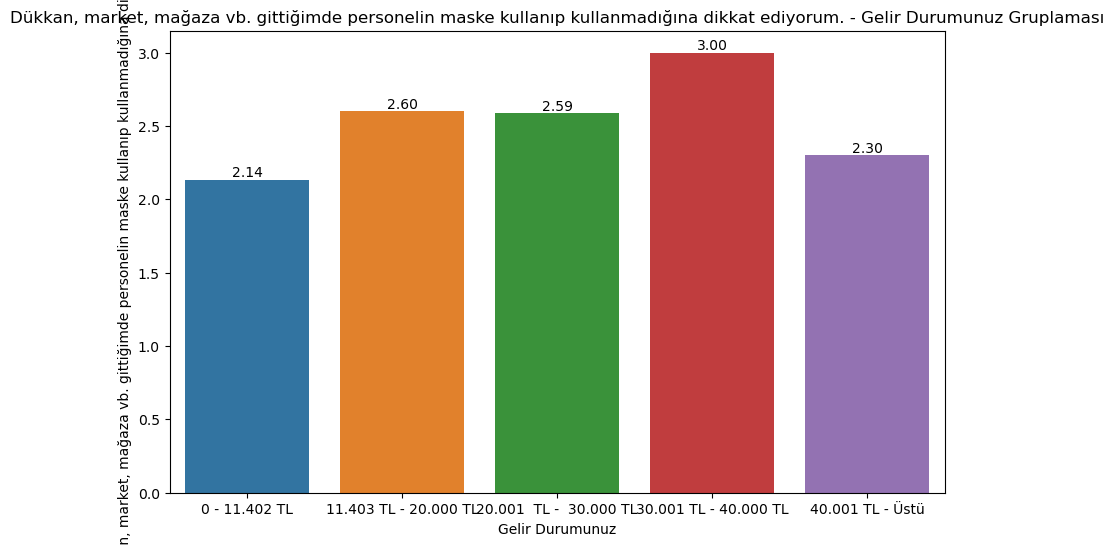

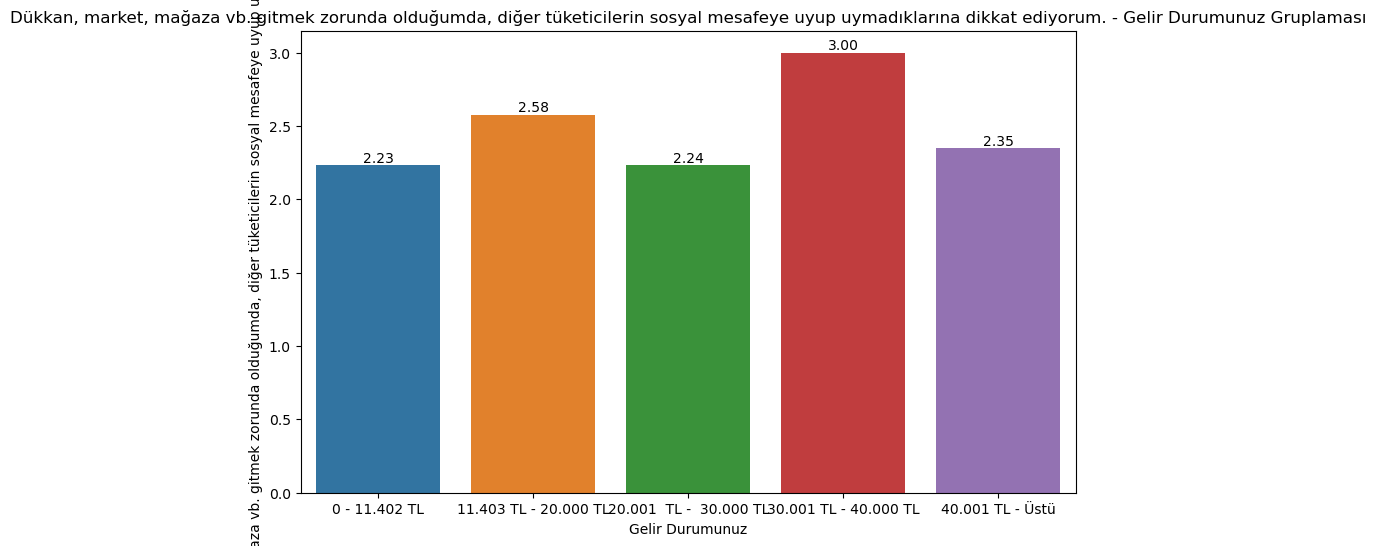

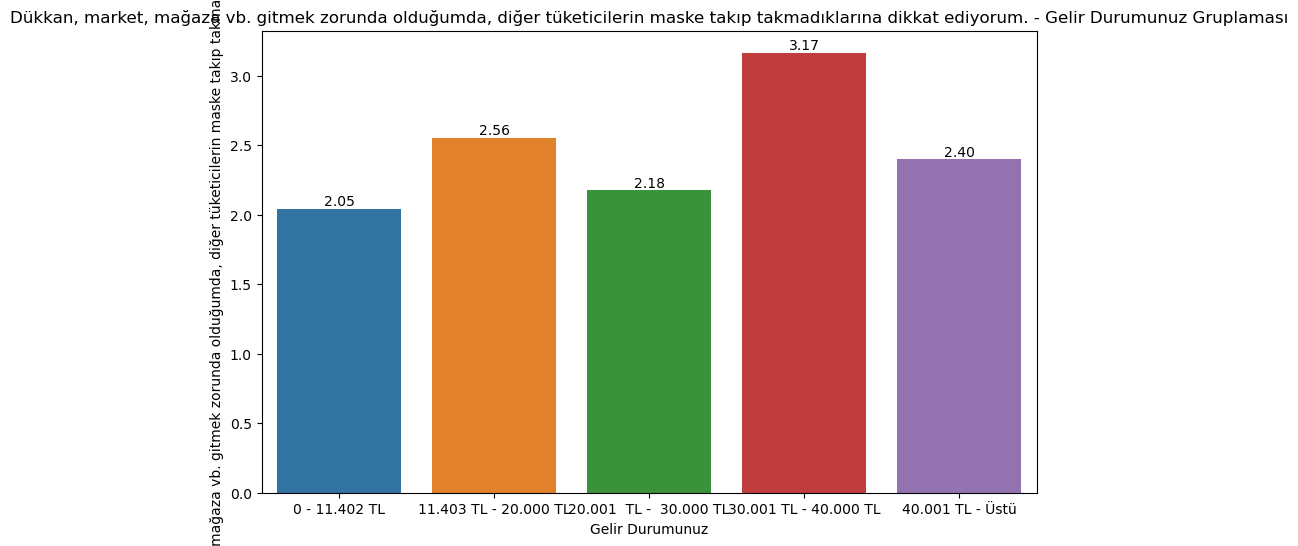

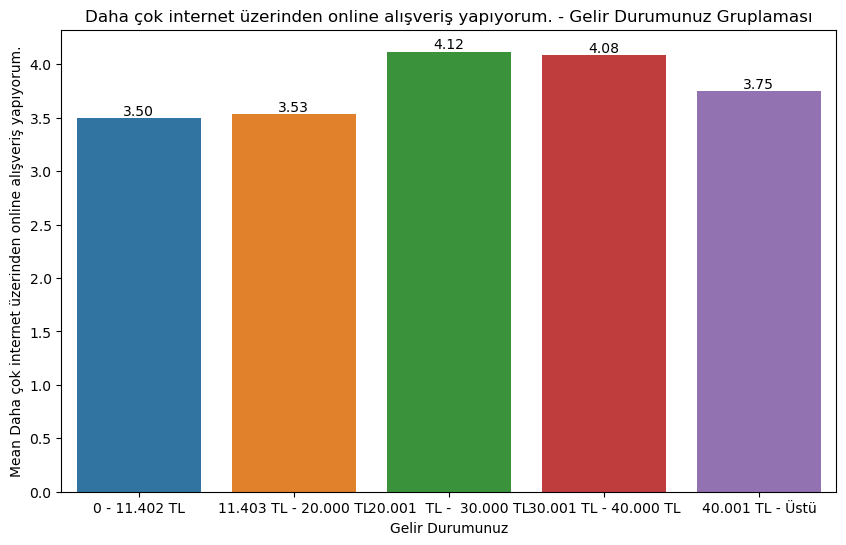

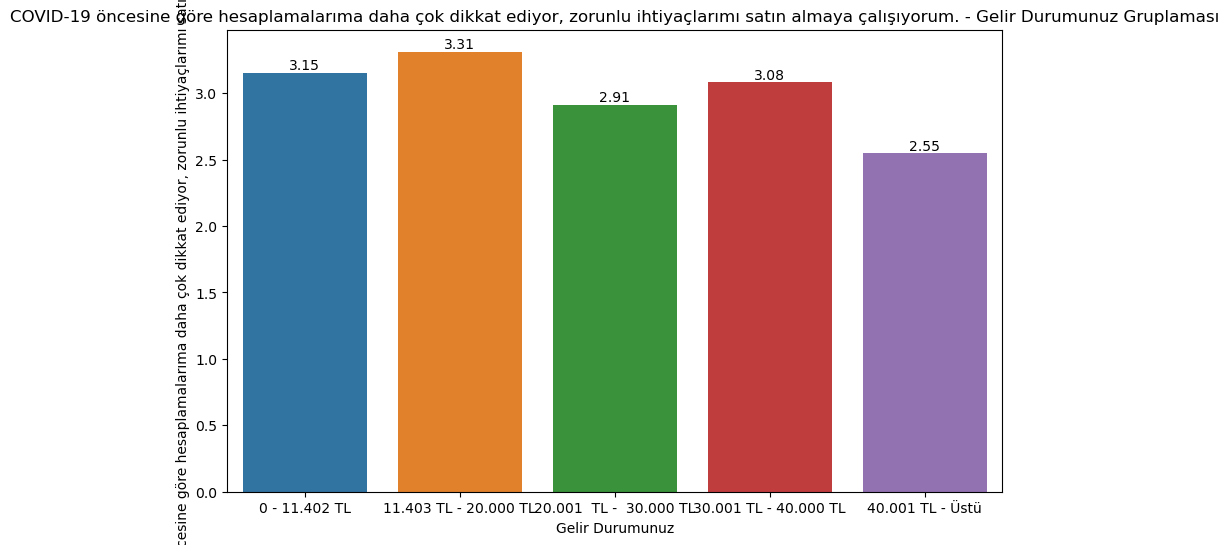

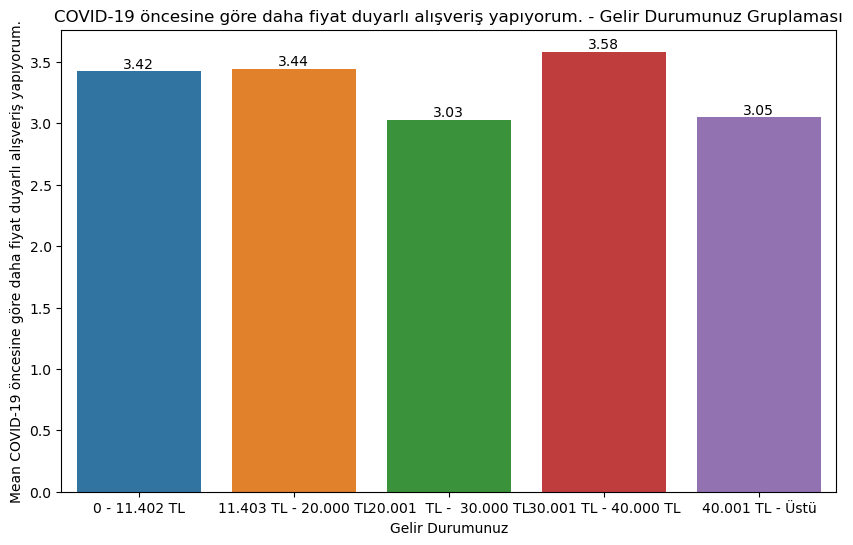

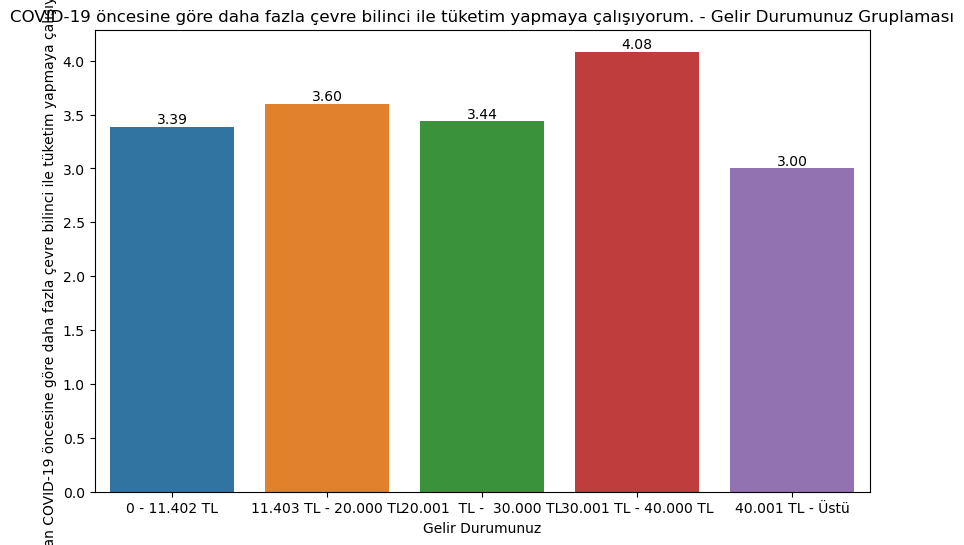

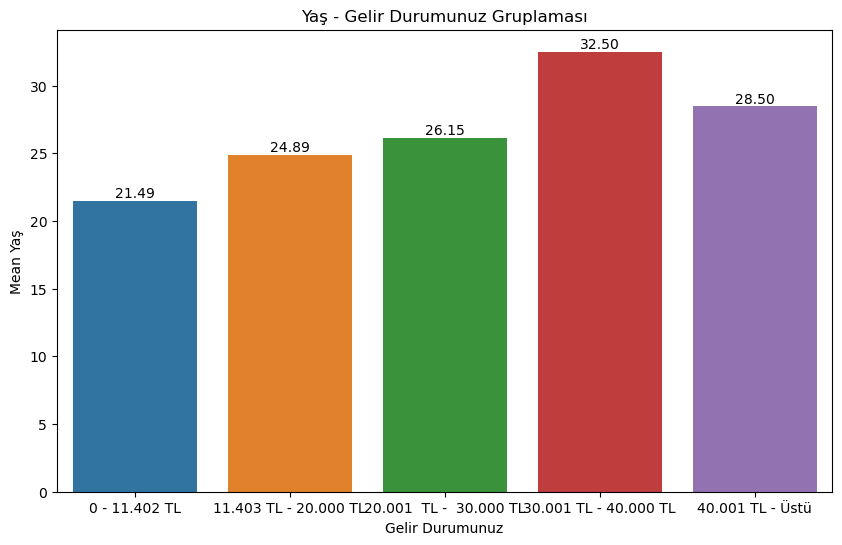

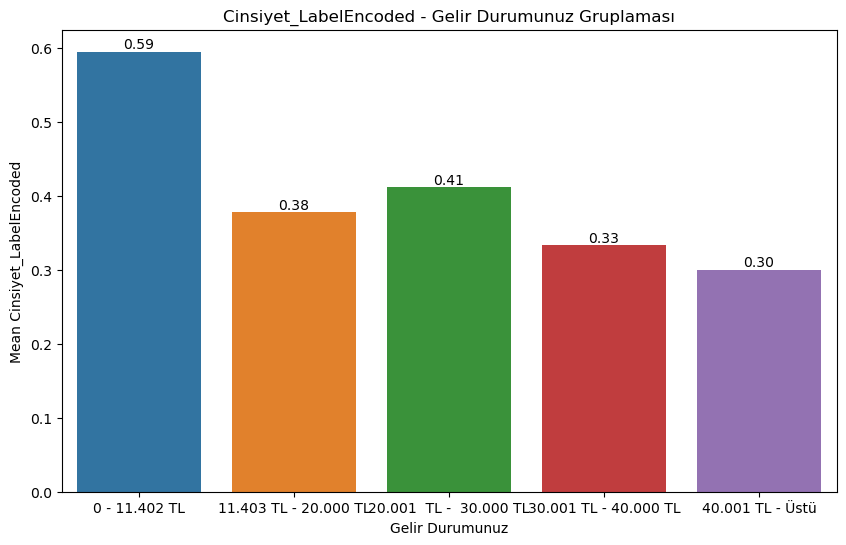

In [19]:
visualize_groupby(df, "Gelir Durumunuz")

### Burada Eğitim Durumuna göre fonksiyonumuzu çağırıyoruz. Buradaki amacımız da COVİD-19'un bireylerin tüketim davranışları üzerindeki etkileri eğitim durumuna göre farklılık gösteriyor mu? Sorusuna cevap aramaktır. Analiz sonuçları görselleştirilmiştir.

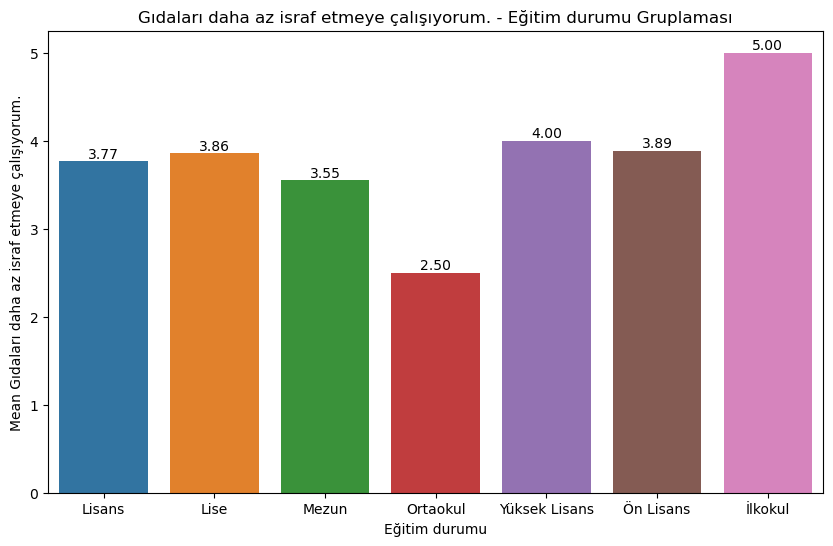

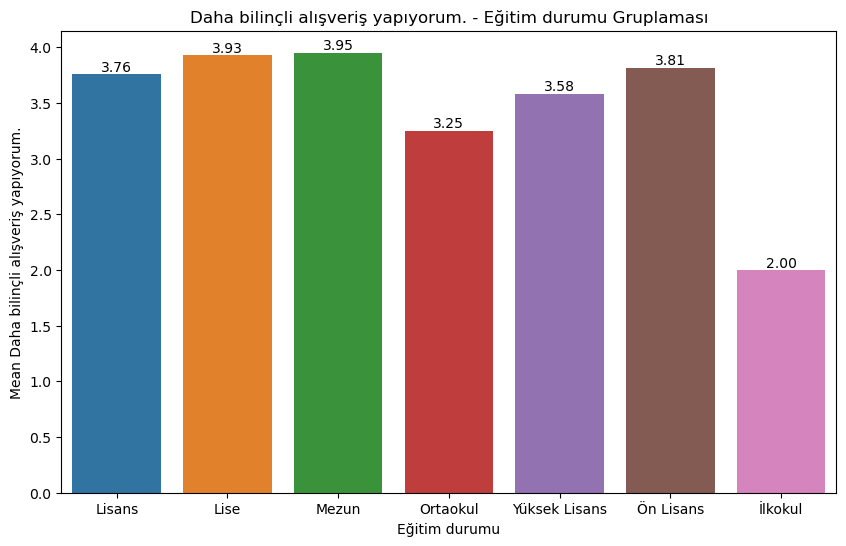

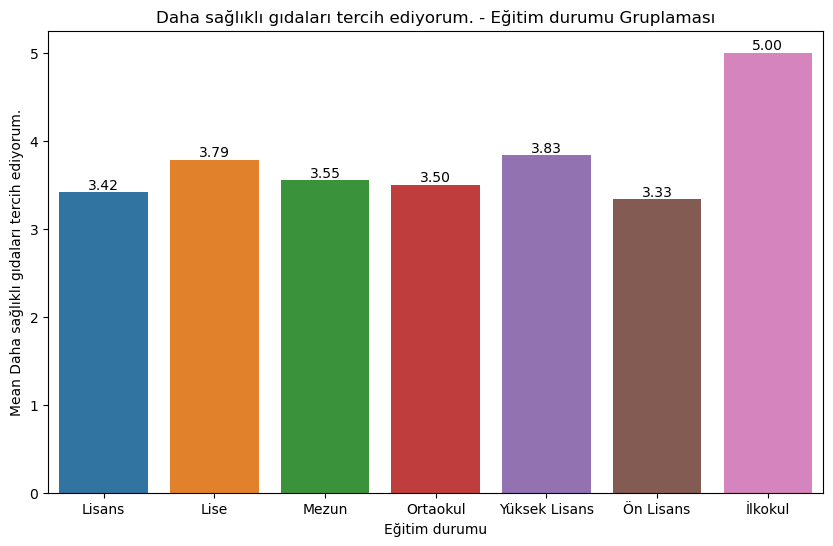

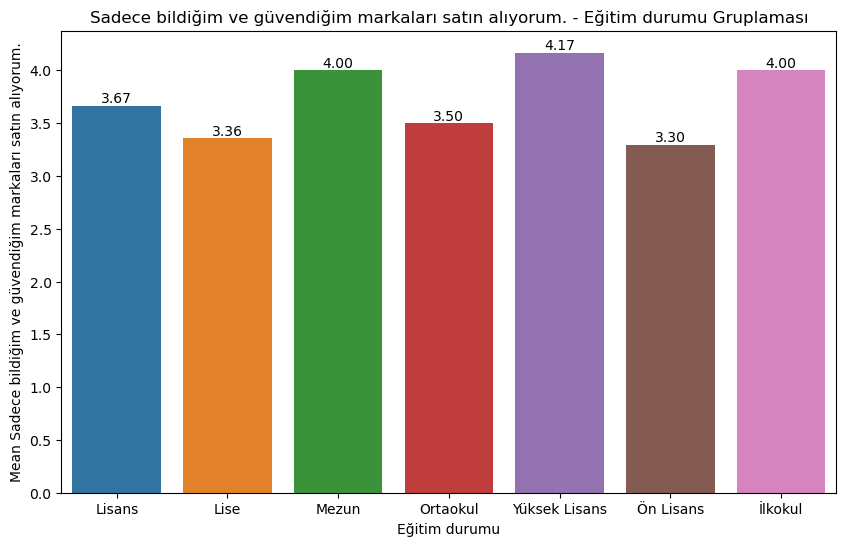

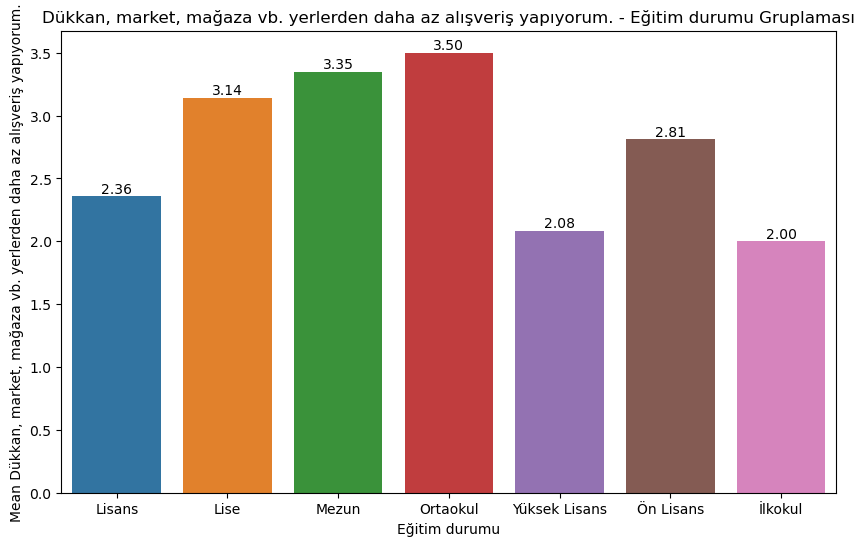

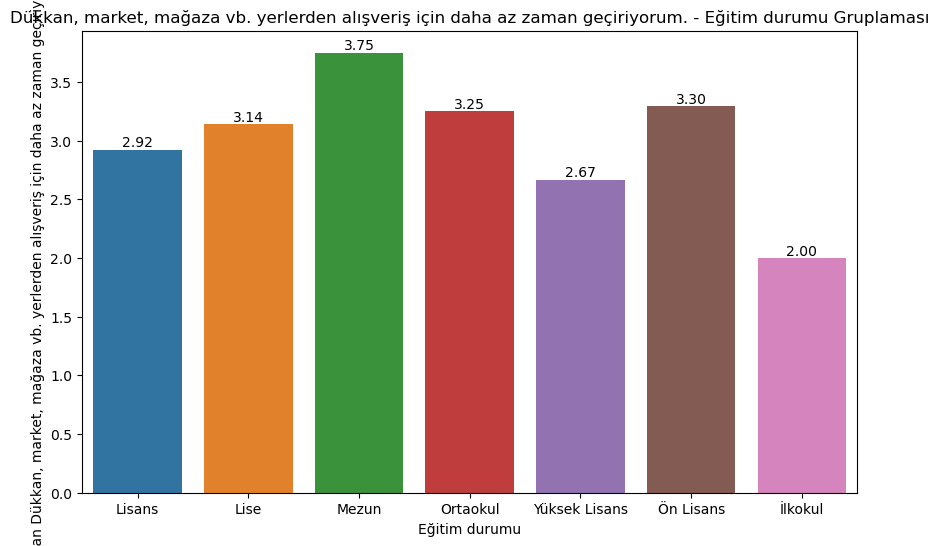

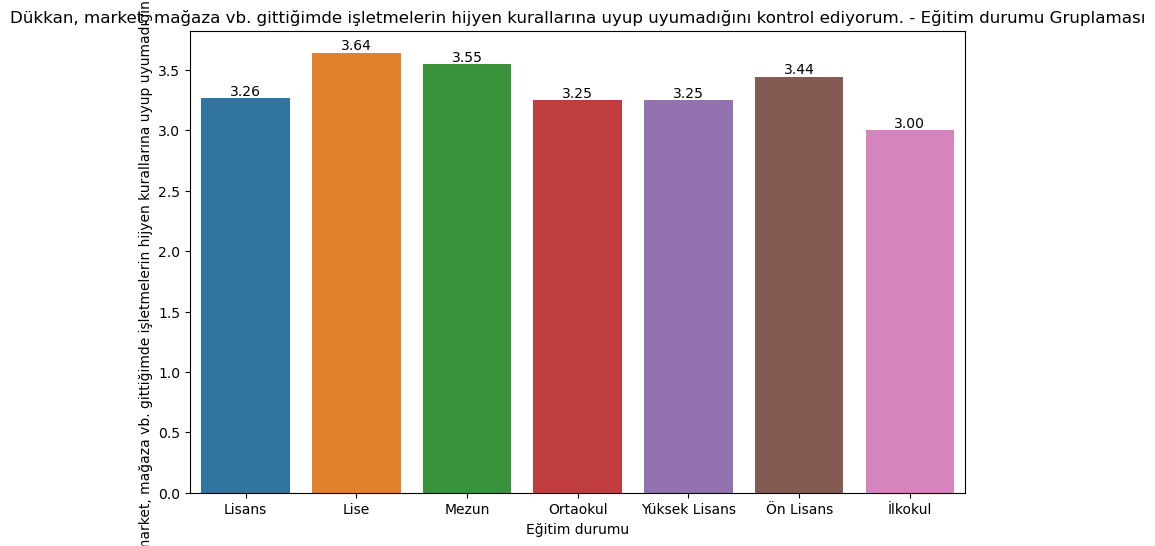

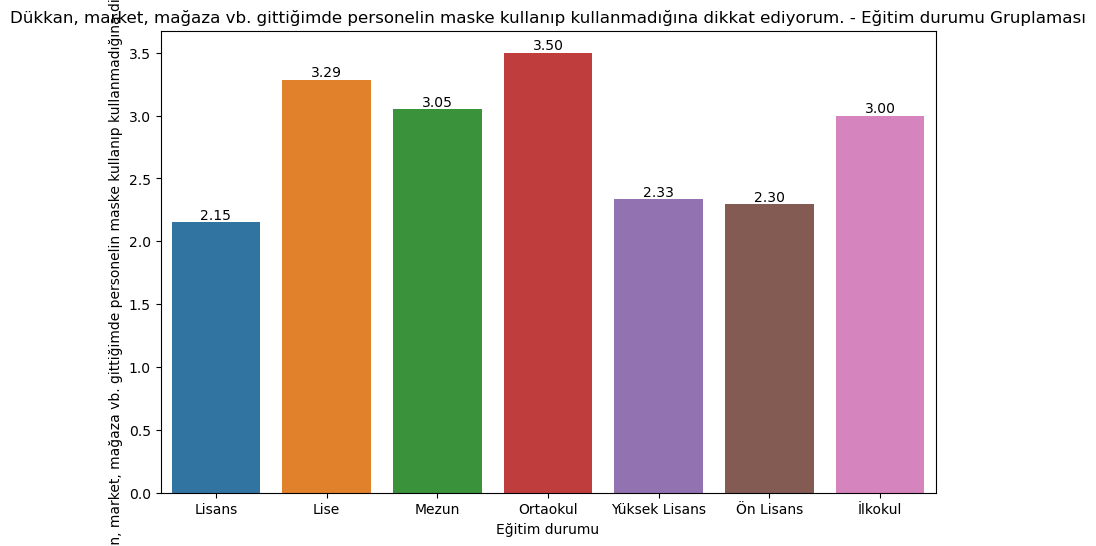

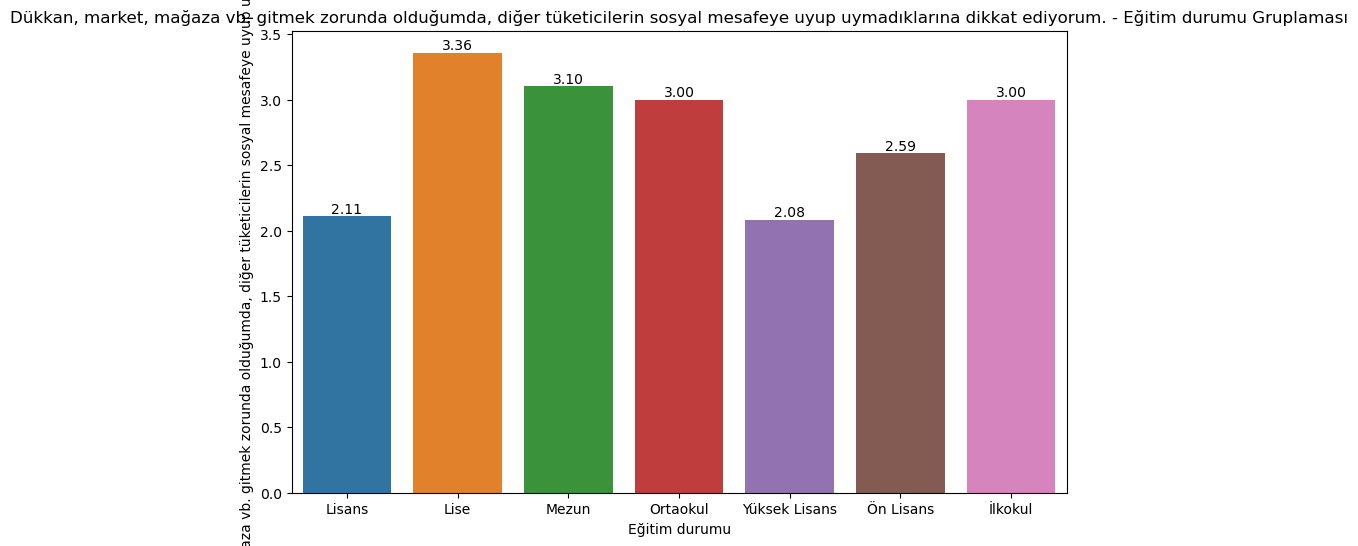

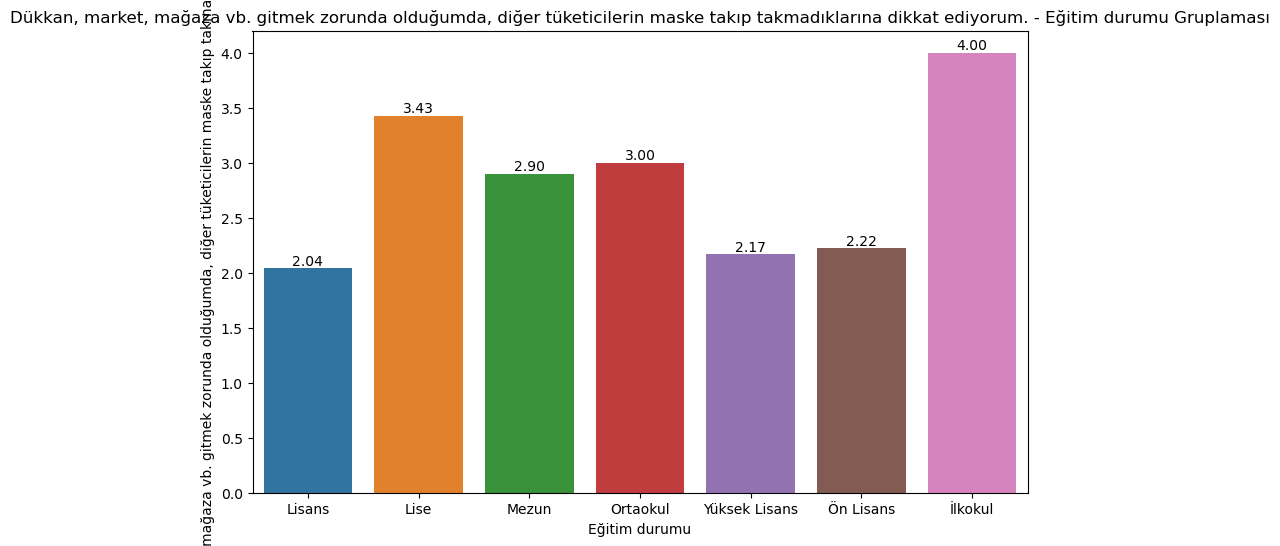

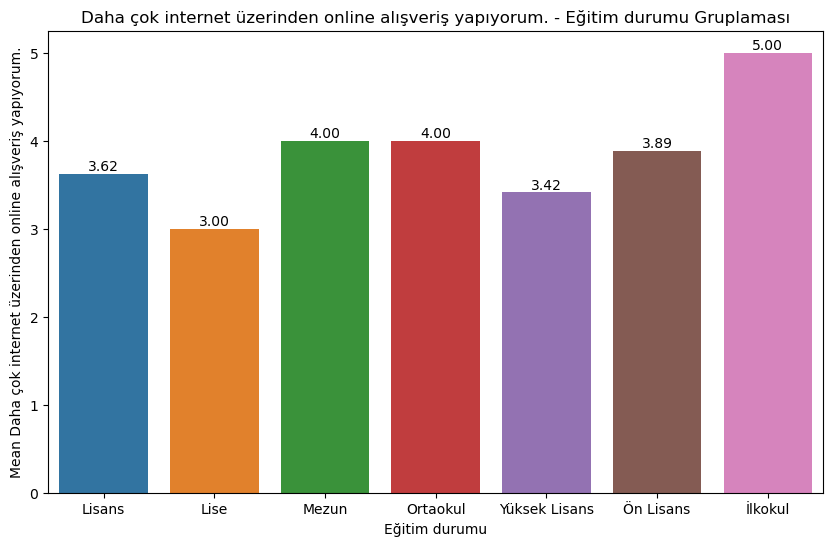

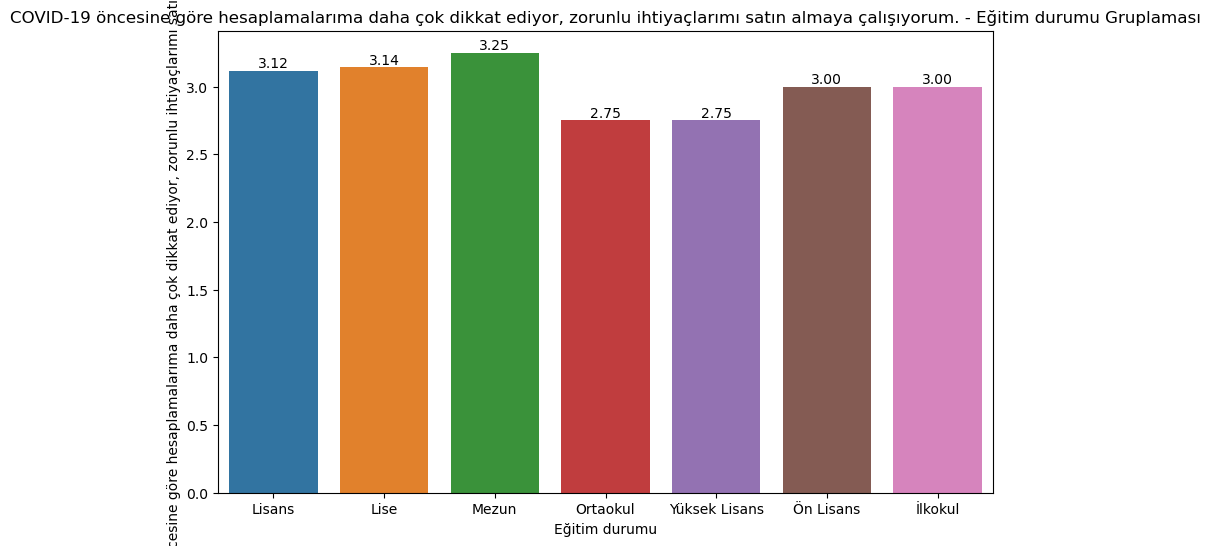

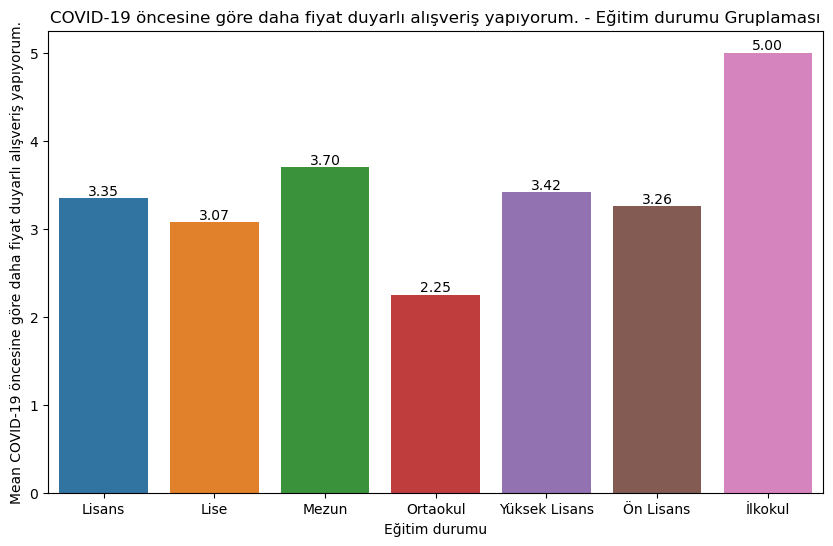

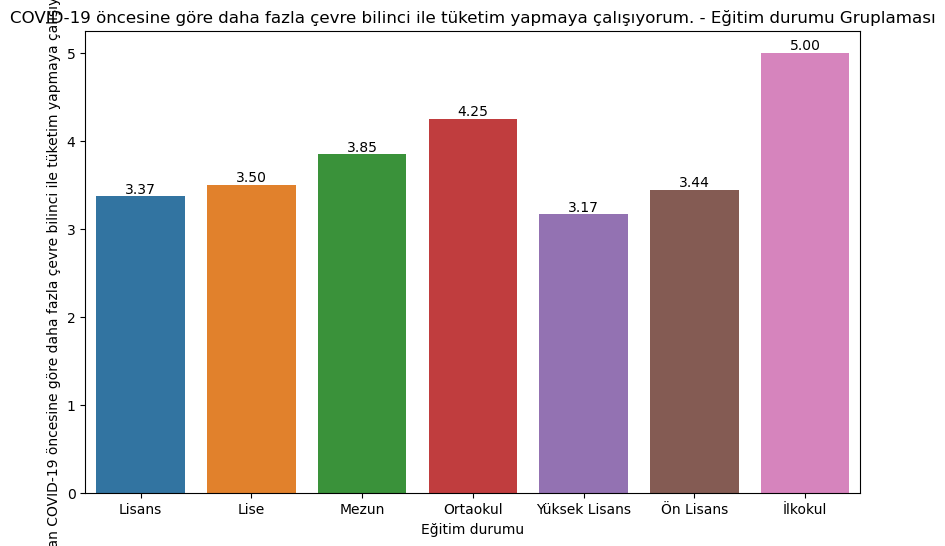

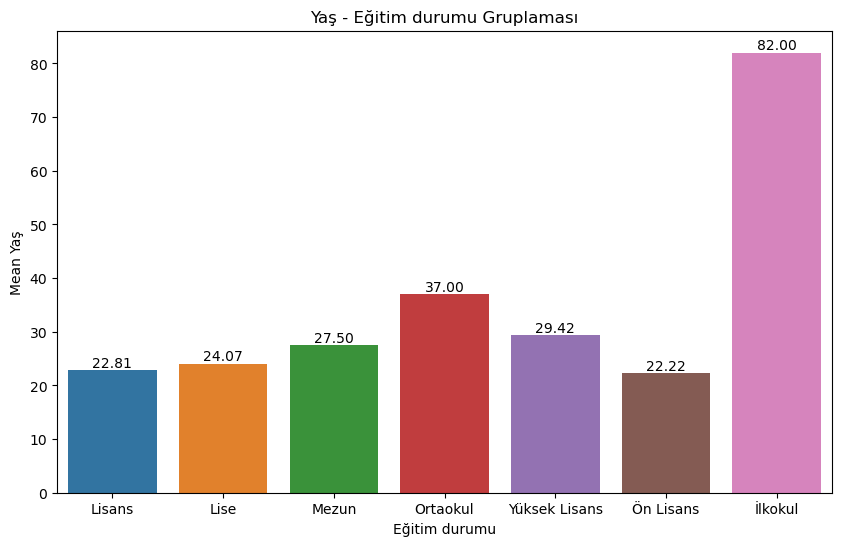

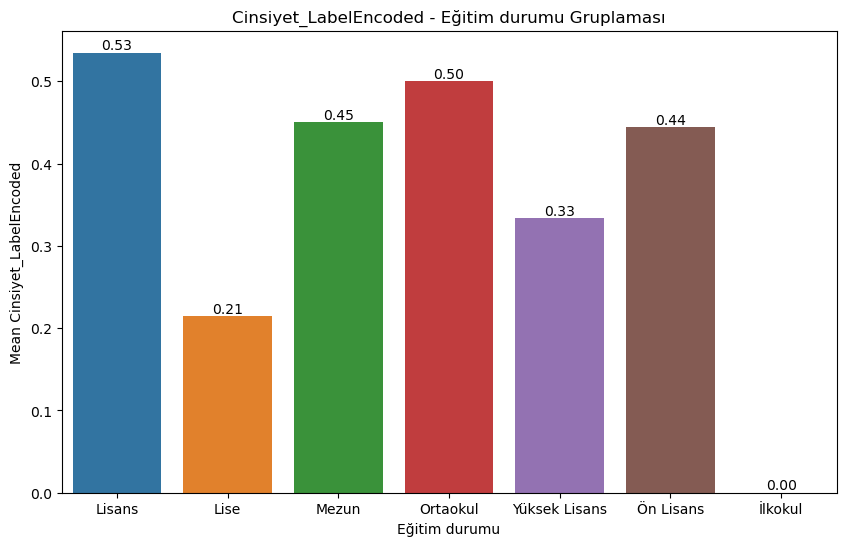

In [20]:
visualize_groupby(df, "Eğitim durumu") 

### Korelasyon matrisi oluşturulmuştur ve değişkenler arası korelasyonun rahat gözlemlenmesi için Headmap oluşturulmuştur

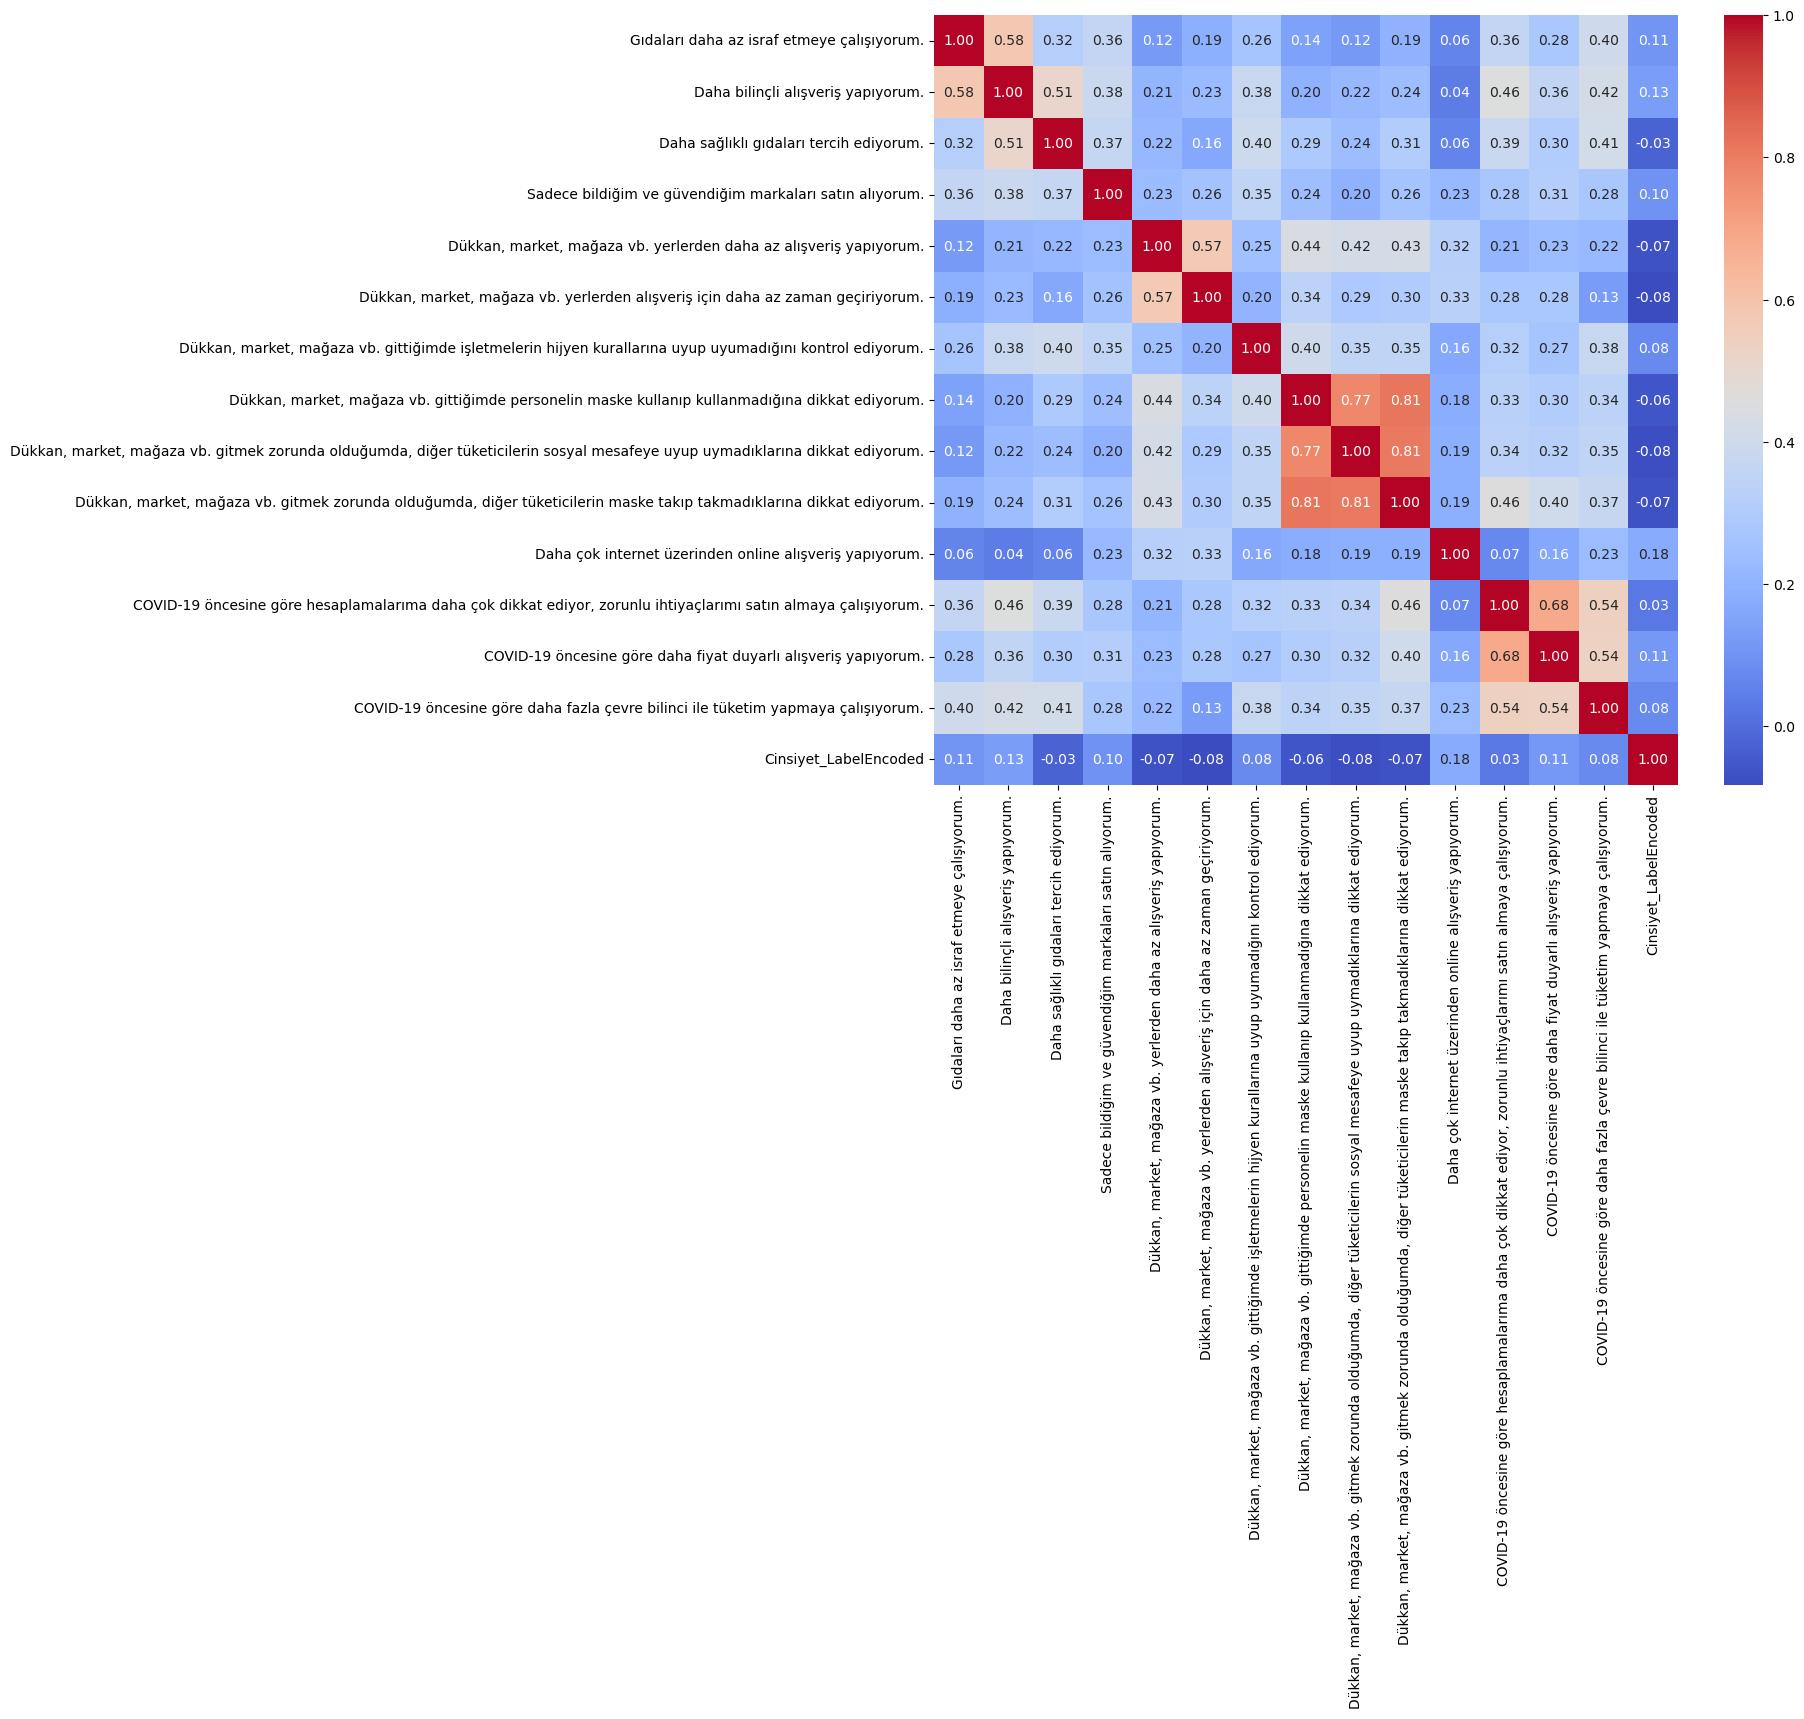

In [21]:
df_copy = df.copy()

df_copy.drop(["Cinsiyet", "Yaş", "Eğitim durumu", "Fakülte", "Bölüm", "Gelir Durumunuz"], axis=1, inplace=True)

label_encoder = LabelEncoder()

df_copy['Cinsiyet_LabelEncoded'] = label_encoder.fit_transform(df['Cinsiyet'])

correlation_matrix = df_copy.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

### Verimize Cronbach Alpha testi uygulanmıştır. Sonuç  akademik kabul değerinin altında olduğu için çalışmadan edinilen bilgilere göre outlier değerlerin gözlemlenmesine karar verilmiştir.

In [22]:
numeric_df = df.select_dtypes(include='number')
alpha = cronbach_alpha(numeric_df)
print("Cronbach'ın Alfa Katsayısı:", alpha)

Cronbach'ın Alfa Katsayısı: (0.6344674231869495, array([0.56 , 0.701]))


### Outlier gözlemi için Boxplot grafik kullanılmıştır ve değişkenler gözlemlenmiştir.

In [23]:
def plot_all_boxplots(dataframe):
    numeric_columns = dataframe.select_dtypes(include='number').columns

    plt.figure(figsize=(12, 8 * len(numeric_columns)))
    for i, column in enumerate(numeric_columns, start=1):
        plt.subplot(len(numeric_columns), 1, i)
        sns.boxplot(data=dataframe[column])
        plt.title(f'{column} Boxplot')
        plt.xlabel(column)
        plt.ylabel('Değerler')

    plt.tight_layout()
    plt.show()

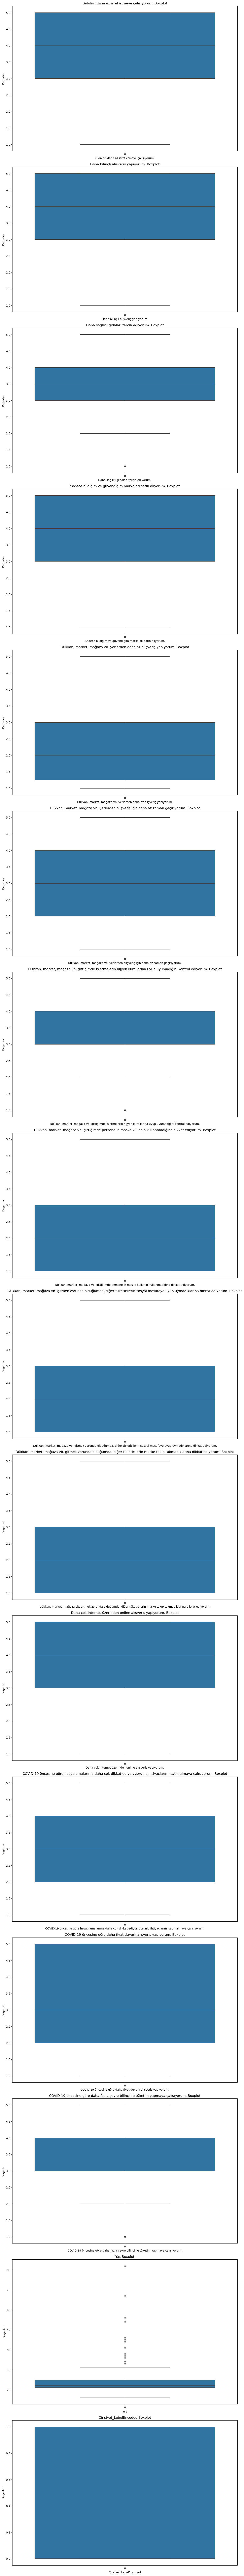

In [24]:
plot_all_boxplots(df)

### Yaş değişkenin baskılanmasına karar verilmiştir ve eşik değer belirlenerek baskılanmıştır. 

In [25]:
eşik_değer = 48
df['Yaş_Baskılı'] = df['Yaş'].apply(lambda x: eşik_değer if x > eşik_değer else x)

print(df[['Yaş', 'Yaş_Baskılı']])

     Yaş  Yaş_Baskılı
0     21           21
1     23           23
2     23           23
3     22           22
4     26           26
..   ...          ...
217   21           21
218   22           22
219   22           22
220   18           18
221   21           21

[222 rows x 2 columns]


### Yeni değerlerin gözlemlenmesi

<Axes: >

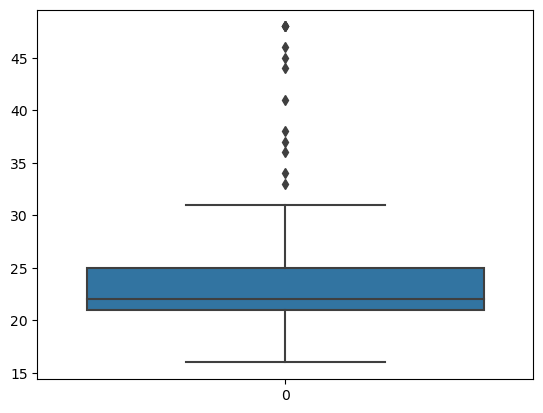

In [26]:
sns.boxplot(data= df["Yaş_Baskılı"])

### Cronbach Alpha testi sonucu iyileştirilmiştir ve kabul edilebilir değerin üzerine çıkarılmıştır

In [27]:
numeric_df = df.select_dtypes(include='number')
alpha = cronbach_alpha(numeric_df)
print("Cronbach'ın Alfa Katsayısı:", alpha)

Cronbach'ın Alfa Katsayısı: (0.693662892703681, array([0.632, 0.749]))


### Ki- Kare Testi uygulanmıştır ve sonuçları gözlemlenmiştir 

### Ki- Kare Testi - Gelir Durumu - Online Alışveriş

In [28]:
contingency_table = pd.crosstab(df['Gelir Durumunuz'], df['Daha çok internet üzerinden online alışveriş yapıyorum.'])

chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Ki-kare İstatistiği: {chi2_stat}") 
print(f"P Değeri: {p_value}")

if p_value < 0.05:
    print("Gelir Durumu ve Online Alışveriş arasında anlamlı bir bağımlılık vardır.")
else:
    print("Gelir Durumu ve Online Alışveriş arasında anlamlı bir bağımlılık yoktur.")

Ki-kare İstatistiği: 20.67548298950153
P Değeri: 0.19132455348515678
Gelir Durumu ve Online Alışveriş arasında anlamlı bir bağımlılık yoktur.


### Ki- Kare Testi -  Eğitim durumu - Online alışveriş

In [29]:
contingency_table = pd.crosstab(df['Eğitim durumu'], df['Daha çok internet üzerinden online alışveriş yapıyorum.'])

chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Ki-kare İstatistiği: {chi2_stat}") 
print(f"P Değeri: {p_value}")

if p_value < 0.05:
    print("Eğitim Durumu ve Online Alışveriş arasında anlamlı bir bağımlılık vardır.")
else:
    print("Eğitim Durumu ve Online Alışveriş arasında anlamlı bir bağımlılık yoktur.")

Ki-kare İstatistiği: 21.832142126451274
P Değeri: 0.5892849632563324
Eğitim Durumu ve Online Alışveriş arasında anlamlı bir bağımlılık yoktur.


### Ki- Kare Testi - Eğitim durumu - Çevre Bilinci

In [30]:
contingency_table = pd.crosstab(df['Eğitim durumu'], df['Dükkan, market, mağaza vb. gittiğimde işletmelerin hijyen kurallarına uyup uyumadığını kontrol ediyorum.'])

chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Ki-kare İstatistiği: {chi2_stat}") 
print(f"P Değeri: {p_value}")

if p_value < 0.05:
    print("Eğitim Durumu ve Çevre Bilinci arasında anlamlı bir bağımlılık vardır.")
else:
    print("Eğitim Durumu ve Çevre Bilinci arasında anlamlı bir bağımlılık yoktur.")

Ki-kare İstatistiği: 21.112591450929038
P Değeri: 0.6320744940177412
Eğitim Durumu ve Çevre Bilinci arasında anlamlı bir bağımlılık yoktur.


### Ki- Kare Testi - Cinsiyet - Online Alışveriş

In [31]:
contingency_table = pd.crosstab(df['Cinsiyet'], df['Daha çok internet üzerinden online alışveriş yapıyorum.'])

chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Ki-kare İstatistiği: {chi2_stat}") 
print(f"P Değeri: {p_value}")

if p_value < 0.05:
    print("Cinsiyet ve Online Alışveriş arasında anlamlı bir bağımlılık vardır.")
else:
    print("Cinsiyet ve Online Alışveriş arasında anlamlı bir bağımlılık yoktur.")

Ki-kare İstatistiği: 15.954427592386988
P Değeri: 0.0030809286130118897
Cinsiyet ve Online Alışveriş arasında anlamlı bir bağımlılık vardır.


### Ki- Kare Testi - Cinsiyet - Çevre Bilinci

In [32]:
contingency_table = pd.crosstab(df['Cinsiyet'], df['Dükkan, market, mağaza vb. gittiğimde işletmelerin hijyen kurallarına uyup uyumadığını kontrol ediyorum.'])

chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Ki-kare İstatistiği: {chi2_stat}") 
print(f"P Değeri: {p_value}")

if p_value < 0.05:
    print("Cinsiyet ve Çevre Bilinci arasında anlamlı bir bağımlılık vardır.")
else:
    print("Cinsiyet ve Çevre Bilinci arasında anlamlı bir bağımlılık yoktur.")

Ki-kare İstatistiği: 7.135055604762986
P Değeri: 0.12892096895435562
Cinsiyet ve Çevre Bilinci arasında anlamlı bir bağımlılık yoktur.


### T - Test uygulanmıştır ve sonuçları gözlemlenmiştir

In [33]:
label_encoder = LabelEncoder()
df['EğitimDurumu_LabelEncoded'] = label_encoder.fit_transform(df['Eğitim durumu'])

### T-Test  Cinsiyet - Online Alışveriş

In [34]:
df1 = df["Daha çok internet üzerinden online alışveriş yapıyorum."]
df2 = df["Cinsiyet_LabelEncoded"]

t_statistic, p_value = stats.ttest_ind(df1, df2)

print(f"T İstatistiği: {t_statistic}") 
print(f"P Değeri: {p_value}")

if p_value < 0.05:
    print("Cinsiyet ve online alışveriş arasında anlamlı bir fark vardır.")
else:
    print("Cinsiyet ve online alışveriş arasında anlamlı bir fark yoktur.")

T İstatistiği: 34.04316379797149
P Değeri: 1.3194174330114754e-125
Cinsiyet ve online alışveriş arasında anlamlı bir fark vardır.


### T-Test  Cinsiyet - Çevre Bilinci

In [35]:
df1 = df["Dükkan, market, mağaza vb. gittiğimde işletmelerin hijyen kurallarına uyup uyumadığını kontrol ediyorum."]
df2 = df["EğitimDurumu_LabelEncoded"]

t_statistic, p_value = stats.ttest_ind(df1, df2)

print(f"T İstatistiği: {t_statistic}") 
print(f"P Değeri: {p_value}")

if p_value < 0.05:
    print("Cinsiyet ve Çevre Bilinci arasında anlamlı bir fark vardır.")
else:
    print("Cinsiyet ve Çevre Bilinci arasında anlamlı bir fark yoktur.")

T İstatistiği: 14.85306675716913
P Değeri: 9.029120791879965e-41
Cinsiyet ve Çevre Bilinci arasında anlamlı bir fark vardır.


### T-Test  Cinsiyet Tüketim Alışkanlıkları

In [36]:
df1 = df["Gıdaları daha az israf etmeye çalışıyorum."]
df2 = df["Cinsiyet_LabelEncoded"]

t_statistic, p_value = stats.ttest_ind(df1, df2)

print(f"T İstatistiği: {t_statistic}") 
print(f"P Değeri: {p_value}")

if p_value < 0.05:
    print("Cinsiyet ve Tüketim Alışkanlıkları arasında anlamlı bir fark vardır.")
else:
    print("Cinsiyet ve Tüketim Alışkanlıkları arasında anlamlı bir fark yoktur.")

T İstatistiği: 35.271681717333806
P Değeri: 1.3875188691268321e-130
Cinsiyet ve Tüketim Alışkanlıkları arasında anlamlı bir fark vardır.


### T-Test  Eğitim Durumu - Tüketim Alışkanlıkları

In [37]:
df1 = df["Gıdaları daha az israf etmeye çalışıyorum."]
df2 = df["EğitimDurumu_LabelEncoded"]

t_statistic, p_value = stats.ttest_ind(df1, df2)

print(f"T İstatistiği: {t_statistic}") 
print(f"P Değeri: {p_value}")

if p_value < 0.05:
    print("Eğitim Durumu ve Tüketim Alışkanlıkları arasında anlamlı bir fark vardır.")
else:
    print("Eğitim Durumu ve Tüketim Alışkanlıkları arasında anlamlı bir fark yoktur.")

T İstatistiği: 17.400071633387775
P Değeri: 4.959216494261532e-52
Eğitim Durumu ve Tüketim Alışkanlıkları arasında anlamlı bir fark vardır.


### T-Test  Eğitim Durumu - Online Alışveriş

In [38]:
df1 = df["Daha çok internet üzerinden online alışveriş yapıyorum."]
df2 = df["EğitimDurumu_LabelEncoded"]

t_statistic, p_value = stats.ttest_ind(df1, df2)

print(f"T İstatistiği: {t_statistic}") 
print(f"P Değeri: {p_value}")

if p_value < 0.05:
    print("Eğitim Durumu ve online alışveriş arasında anlamlı bir fark vardır.")
else:
    print("Eğitim Durumu ve online alışveriş arasında anlamlı bir fark yoktur.")

T İstatistiği: 16.647812701870652
P Değeri: 1.1634540216131249e-48
Eğitim Durumu ve online alışveriş arasında anlamlı bir fark vardır.
